### USBL DATA PROCESSING

### GRASSMAP 20_09

**Time: 10_41**

Survey sm_sparse_Ediag (complete) with acoustic communications.
Images with full resolution 1920x1440, 2 fps.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(25,25)})
sns.set_context("paper")

In [2]:
# This notebook reads csv info extracted from bagfile topics
# To obtain the csvs desired files use usbldata_csv_extractor.py script execute by doing: 
# python usbldata_csv_extractor.py path_to_the_bagfile

# Once the csvs are extracted save them following this structure:
# Desired path + turbot + 
                           #  modem_delayed":"modem_delayed.csv
                           #  modem_raw":"modem_raw.csv
                           #  USBLlon":"USBLlon.csv
                           #  nav_status_turbot":"nav_status_tu.csv
                
# Desired path + xiroi + nav_status_xi.csv           



#Path to folder containing the robot files that contain the csvs
#Change this path and reexecute the notebook to obtain the results from a different bagfile:

path ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/'
path2 ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/xiroi/11_14'
path3 ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/xiroi/11_26'
path4 ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/xiroi/11_31'


# path2='/home/eric/lib/postprocessing_cat/csvs/andratx/21_07/15_09/'

In [3]:
robots=["turbot","xiroi"]

csv_files={"modem_delayed":"modem_delayed.csv",
           "modem_raw":"modem_raw.csv",
           "USBLlon":"USBLlon.csv",
           "nav_status_turbot":"nav_status_tu.csv",
           "xiroi_setpoints":"xiroi_setpoints.csv",
           "nav_status_xiroi":"nav_status_xi.csv"}

#Creates dataframe, sets timestamp as index and resamples to 0.1S (averages data for each 0.1s so that there is only 10 measures for second)
#Resampling allows joining diferent dataframes from different topics
def create_df(csv_file,robot):
    df=pd.read_csv(path+robot+"/"+csv_files[csv_file],header=0,index_col=0)
    original_df=df.copy(deep=False)
    
    df=df.rename(columns={df.columns[0]:"stamp"})
    df['stamp'] = pd.to_datetime(df["stamp"], unit='ns')
    df = df.set_index('stamp')
    df=df.resample('0.1S').mean()
    return original_df,df
    

In [4]:


path ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/'
path2 ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/xiroi/11_14'
path3 ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/xiroi/11_26'
path4 ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/xiroi/11_31'


In [5]:
path ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/'
path2 ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/xiroi/11_14'
path3 ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/xiroi/11_26_40'
path4 ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/20_09/xiroi/11_31'

#Create topic dataframes:
robot="turbot"
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT NAVIGATION")
turbot_nav_status_0,turbot_nav_status=create_df("nav_status_turbot",robot)
display(turbot_nav_status.head())
display(turbot_nav_status.tail())
display(turbot_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT USBLLONG")
USBLlon_0,USBLlon_t=create_df("USBLlon",robot)
display(USBLlon_t.head())
display(USBLlon_t.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM DELAYED")
modem_delayed_0,modem_delayed=create_df("modem_delayed",robot)
display(modem_delayed.head())
display(modem_delayed.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM RAW")
modem_raw_0,modem_raw=create_df("modem_raw",robot)
display(modem_raw.head())
display(modem_raw.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

robot="xiroi"
print("XIROI NAVIGATION")
xiroi_nav_status_0,xiroi_nav_status=create_df("nav_status_xiroi",robot)
display(xiroi_nav_status.head())
display(xiroi_nav_status.tail())
display(xiroi_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI SETPOINTS")
xiroi_setpoints_0,xiroi_setpoints=create_df("xiroi_setpoints",robot)
display(xiroi_setpoints.head())
display(xiroi_setpoints.tail())

display(xiroi_setpoints.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI USBLLONG")
USBLlon_0_x,USBLlon=create_df("USBLlon",robot)
display(USBLlon_0_x.head())
USBLlon_0_x.describe()

print("MODEM DELAYED")
modem_delayed_0,modem_delayed=create_df("modem_delayed",robot)
display(modem_delayed.head())
display(modem_delayed.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")


#XIROI BAGFILE IS DIVIDED IN VARIOUS BAGFILES
#APPEND DATAFRAMES OF ALL XIROI BAGFILES:
path=path2
robot=""
print("XIROI NAVIGATION2")
xiroi_nav_status_02,xiroi_nav_status_2=create_df("nav_status_xiroi",robot)
display(xiroi_nav_status_2.head())
display(xiroi_nav_status_2.tail())
display(xiroi_nav_status_2.describe())

xiroi_nav_status=xiroi_nav_status.append(xiroi_nav_status_2)

display(xiroi_nav_status.head())
display(xiroi_nav_status.tail())
display(xiroi_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI SETPOINTS2")
xiroi_setpoints_02,xiroi_setpoints2=create_df("xiroi_setpoints",robot)
display(xiroi_setpoints2.head())
display(xiroi_setpoints2.describe())

xiroi_setpoints=xiroi_setpoints.append(xiroi_setpoints2)
display(xiroi_setpoints.head())
display(xiroi_setpoints.tail())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI USBLLONG2")
USBLlon_0_2,USBLlon_2=create_df("USBLlon",robot)
display(USBLlon_0_x.head())
USBLlon_0_x.describe()
USBLlon=USBLlon.append(USBLlon_2)

print("MODEM DELAYED2")
modem_delayed_02,modem_delayed_2=create_df("modem_delayed",robot)
display(modem_delayed.head())
display(modem_delayed.describe())
modem_delayed=modem_delayed.append(modem_delayed_2)
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

#path3
path=path3
robot=""
print("XIROI NAVIGATION3")
xiroi_nav_status_03,xiroi_nav_status_3=create_df("nav_status_xiroi",robot)
xiroi_nav_status=xiroi_nav_status.append(xiroi_nav_status_3)

print("XIROI SETPOINTS3")
xiroi_setpoints_03,xiroi_setpoints3=create_df("xiroi_setpoints",robot)
xiroi_setpoints=xiroi_setpoints.append(xiroi_setpoints3)

print("XIROI USBLLONG3")
USBLlon_0_3,USBLlon_3=create_df("USBLlon",robot)
display(USBLlon_0_x.head())
USBLlon_0_x.describe()
USBLlon=USBLlon.append(USBLlon_3)

print("MODEM DELAYED3")
modem_delayed_03,modem_delayed_3=create_df("modem_delayed",robot)
modem_delayed=modem_delayed.append(modem_delayed_3)

#path4
path=path4
robot=""
print("XIROI NAVIGATION4")
xiroi_nav_status_04,xiroi_nav_status_4=create_df("nav_status_xiroi",robot)
xiroi_nav_status=xiroi_nav_status.append(xiroi_nav_status_4)

display(xiroi_nav_status.head())
display(xiroi_nav_status.tail())

print("XIROI SETPOINTS4")
xiroi_setpoints_04,xiroi_setpoints4=create_df("xiroi_setpoints",robot)
xiroi_setpoints=xiroi_setpoints.append(xiroi_setpoints4)

display(xiroi_setpoints.head())
display(xiroi_setpoints.tail())


print("XIROI USBLLONG4")
USBLlon_0_4,USBLlon_4=create_df("USBLlon",robot)
display(USBLlon_0_x.head())
USBLlon_0_x.describe()
USBLlon=USBLlon.append(USBLlon_4)

display(USBLlon.head())
display(USBLlon.tail())


print("MODEM DELAYED4")
modem_delayed_04,modem_delayed_4=create_df("modem_delayed",robot)
modem_delayed=modem_delayed.append(modem_delayed_4)

display(modem_delayed.head())
display(modem_delayed.tail())



---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT NAVIGATION


nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 08:42:13.000      0.506199    -33.902916   -159.422529   
2021-09-20 08:42:13.100      0.507821    -33.912110   -159.374051   
2021-09-20 08:42:13.200      0.495657    -33.915700   -159.288979   
2021-09-20 08:42:13.300      0.495107    -33.921633   -159.253229   
2021-09-20 08:42:13.400      0.496664    -33.864073   -159.228206   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 08:42:13.000       28.990601                39.1546   
2021-09-20 08:42:13.100       28.993273                39.1546   
2021-09-20 08:42:13.200       28.953911                39.1546   
2021-09-20 08:42:13.300       28.953846                39.1546   
2021-09-20 08:42:13.400       28.953776                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 08:42:13.000                 2.9449         -0.040683   
2021-09-20 08:42:13.100                 2.9449         -0.034624   
2021-09-20 08:42:13.200                 2.9449         -0.018999   
2021-09-20 08:42:13.300                 2.9449          0.004246   
2021-09-20 08:42:13.400                 2.9449          0.019548   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 08:42:13.000        -0.120349       -0.203954  
2021-09-20 08:42:13.100        -0.139917       -0.211839  
2021-09-20 08:42:13.200        -0.155085       -0.219597  
2021-09-20 08:42:13.300        -0.157989       -0.223435  
2021-09-20 08:42:13.400        -0.153864       -0.223712

nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 09:53:51.100      0.573524    -49.068677   -114.906882   
2021-09-20 09:53:51.200      0.571350    -49.070217   -114.897657   
2021-09-20 09:53:51.300      0.570452    -49.070892   -114.893711   
2021-09-20 09:53:51.400      0.561237    -49.055996   -114.905627   
2021-09-20 09:53:51.500      0.559102    -49.052207   -114.905631   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 09:53:51.100       31.712197                39.1546   
2021-09-20 09:53:51.200       31.711325                39.1546   
2021-09-20 09:53:51.300       31.709356                39.1546   
2021-09-20 09:53:51.400       31.703972                39.1546   
2021-09-20 09:53:51.500       31.709902                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 09:53:51.100                 2.9449          0.135507   
2021-09-20 09:53:51.200                 2.9449          0.134705   
2021-09-20 09:53:51.300                 2.9449          0.132833   
2021-09-20 09:53:51.400                 2.9449          0.131082   
2021-09-20 09:53:51.500                 2.9449          0.126642   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 09:53:51.100        -0.097384       -0.182463  
2021-09-20 09:53:51.200        -0.105343       -0.189485  
2021-09-20 09:53:51.300        -0.106868       -0.190681  
2021-09-20 09:53:51.400        -0.105312       -0.188654  
2021-09-20 09:53:51.500        -0.095342       -0.179838

nav_status_D  nav_status_E  nav_status_N  nav_status_alt  \
count  42986.000000  42986.000000  42986.000000    42986.000000   
mean      23.214240    -50.866574   -108.569244        9.682309   
std       11.782016     53.448233     65.756664       11.405599   
min        0.410006   -173.576035   -259.823156        2.820818   
25%       24.653349    -67.728952   -146.212620        3.281640   
50%       27.899069    -53.148673   -110.508008        3.350607   
75%       31.390355    -34.307814    -71.604812        7.927473   
max       33.996507     73.992220     48.789405       33.854649   

       nav_status_origin_lat  nav_status_origin_lon  nav_status_pitch  \
count             42986.0000           4.298600e+04      42986.000000   
mean                 39.1546           2.944900e+00         -0.045518   
std                   0.0000           8.881888e-16          0.115181   
min                  39.1546           2.944900e+00         -0.330711   
25%                  39.1546           2.944900e+00         -0.122353   
50%                  39.1546           2.944900e+00         -0.076105   
75%                  39.1546           2.944900e+00          0.000114   
max                  39.1546           2.944900e+00          0.413158   

       nav_status_roll  nav_status_yaw  
count     42986.000000    42986.000000  
mean         -0.037044       -0.566755  
std           0.042529        1.788367  
min          -0.538171       -3.140884  
25%          -0.047870       -2.407129  
50%          -0.028565       -0.625567  
75%          -0.014403        0.739760  
max           0.297106        3.140446

---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT USBLLONG


usbllong_D  usbllong_E  usbllong_N  usbllong_X  \
stamp                                                                     
2021-09-20 09:45:04.200    -32.3475  -47.801701      1.9229   42.082901   
2021-09-20 09:45:04.300         NaN         NaN         NaN         NaN   
2021-09-20 09:45:04.400         NaN         NaN         NaN         NaN   
2021-09-20 09:45:04.500         NaN         NaN         NaN         NaN   
2021-09-20 09:45:04.600         NaN         NaN         NaN         NaN   

                         usbllong_Y  usbllong_Z  usbllong_pitch  \
stamp                                                             
2021-09-20 09:45:04.200  -23.796499  -31.588301           0.022   
2021-09-20 09:45:04.300         NaN         NaN             NaN   
2021-09-20 09:45:04.400         NaN         NaN             NaN   
2021-09-20 09:45:04.500         NaN         NaN             NaN   
2021-09-20 09:45:04.600         NaN         NaN             NaN   

                         usbllong_roll  usbllong_yaw  
stamp                                                 
2021-09-20 09:45:04.200        -0.0066       -1.0048  
2021-09-20 09:45:04.300            NaN           NaN  
2021-09-20 09:45:04.400            NaN           NaN  
2021-09-20 09:45:04.500            NaN           NaN  
2021-09-20 09:45:04.600            NaN           NaN

usbllong_D  usbllong_E  usbllong_N  usbllong_X  usbllong_Y  usbllong_Z  \
count    4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   
mean   -10.266225  -21.576550  -23.351950  -12.786250  -17.704050   -9.923850   
std     14.770456   18.634928   16.849954   36.649567    4.273938   14.457817   
min    -32.347500  -47.801701  -31.827000  -34.278400  -23.796499  -31.588301   
25%    -11.341050  -28.409025  -31.792574  -30.757525  -19.113575  -10.563775   
50%     -3.668450  -15.300400  -31.751850  -29.474751  -16.180201   -3.072000   
75%     -2.593625   -8.467925  -23.311226  -11.503475  -14.770675   -2.432075   
max     -1.380500   -7.903700    1.922900   42.082901  -14.659300   -1.963100   

       usbllong_pitch  usbllong_roll  usbllong_yaw  
count        4.000000       4.000000      4.000000  
mean         0.012275       0.025100     -0.320500  
std          0.027448       0.023239      0.483489  
min         -0.014100      -0.006600     -1.004800  
25%         -0.007425       0.014850     -0.415600  
50%          0.008400       0.032100     -0.205350  
75%          0.028100       0.042350     -0.110250  
max          0.046400       0.042800      0.133500

----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM DELAYED


modem_delayed_X  modem_delayed_Y  modem_delayed_Z  \
stamp                                                                        
2021-09-20 09:45:04.200       -83.311551       -74.055539         -31.5475   
2021-09-20 09:45:04.300              NaN              NaN              NaN   
2021-09-20 09:45:04.400              NaN              NaN              NaN   
2021-09-20 09:45:04.500              NaN              NaN              NaN   
2021-09-20 09:45:04.600              NaN              NaN              NaN   

                         modem_delayed_ori_W  modem_delayed_ori_X  \
stamp                                                               
2021-09-20 09:45:04.200              0.71098                  0.0   
2021-09-20 09:45:04.300                  NaN                  NaN   
2021-09-20 09:45:04.400                  NaN                  NaN   
2021-09-20 09:45:04.500                  NaN                  NaN   
2021-09-20 09:45:04.600                  NaN                  NaN   

                         modem_delayed_ori_Y  modem_delayed_ori_Z  
stamp                                                              
2021-09-20 09:45:04.200                  0.0            -0.703213  
2021-09-20 09:45:04.300                  NaN                  NaN  
2021-09-20 09:45:04.400                  NaN                  NaN  
2021-09-20 09:45:04.500                  NaN                  NaN  
2021-09-20 09:45:04.600                  NaN                  NaN

modem_delayed_X  modem_delayed_Y  modem_delayed_Z  modem_delayed_ori_W  \
count         4.000000         4.000000         4.000000             4.000000   
mean       -103.017209       -64.405712        -9.466225             0.924797   
std          13.208256         6.906503        14.770456             0.142551   
min        -111.509665       -74.055539       -31.547500             0.710980   
25%        -109.486895       -67.066578       -10.541050             0.923414   
50%        -108.623811       -62.162568        -2.868450             0.995534   
75%        -102.154125       -59.501701        -1.793625             0.996917   
max         -83.311551       -59.242172        -0.580500             0.997139   

       modem_delayed_ori_X  modem_delayed_ori_Y  modem_delayed_ori_Z  
count                  4.0                  4.0             4.000000  
mean                   0.0                  0.0            -0.110226  
std                    0.0                  0.0             0.395577  
min                    0.0                  0.0            -0.703213  
25%                    0.0                  0.0            -0.119116  
50%                    0.0                  0.0             0.077496  
75%                    0.0                  0.0             0.086385  
max                    0.0                  0.0             0.107317

----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM RAW


Empty DataFrame
Columns: [modem_raw_X, modem_raw_Y, modem_raw_Z, modem_raw_ori_W, modem_raw_ori_X, modem_raw_ori_Y, modem_raw_ori_Z]
Index: []

modem_raw_X modem_raw_Y modem_raw_Z modem_raw_ori_W modem_raw_ori_X  \
count            0           0           0               0               0   
unique           0           0           0               0               0   
top            NaN         NaN         NaN             NaN             NaN   
freq           NaN         NaN         NaN             NaN             NaN   

       modem_raw_ori_Y modem_raw_ori_Z  
count                0               0  
unique               0               0  
top                NaN             NaN  
freq               NaN             NaN

----------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI NAVIGATION


nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 08:55:49.600           0.0   -130.563123    -85.852012   
2021-09-20 08:55:49.700           0.0   -130.577015    -85.828461   
2021-09-20 08:55:49.800           0.0   -130.599361    -85.787284   
2021-09-20 08:55:49.900           0.0   -130.611185    -85.760428   
2021-09-20 08:55:50.000           0.0   -130.633773    -85.722165   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 08:55:49.600             0.0                39.1546   
2021-09-20 08:55:49.700             0.0                39.1546   
2021-09-20 08:55:49.800             0.0                39.1546   
2021-09-20 08:55:49.900             0.0                39.1546   
2021-09-20 08:55:50.000             0.0                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 08:55:49.600                 2.9449               0.0   
2021-09-20 08:55:49.700                 2.9449               0.0   
2021-09-20 08:55:49.800                 2.9449               0.0   
2021-09-20 08:55:49.900                 2.9449               0.0   
2021-09-20 08:55:50.000                 2.9449               0.0   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 08:55:49.600              0.0       -0.088441  
2021-09-20 08:55:49.700              0.0       -0.120449  
2021-09-20 08:55:49.800              0.0       -0.169686  
2021-09-20 08:55:49.900              0.0       -0.158685  
2021-09-20 08:55:50.000              0.0       -0.196628

nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 09:12:39.200           0.0   -120.817044   -204.913619   
2021-09-20 09:12:39.300           0.0   -120.820707   -204.925612   
2021-09-20 09:12:39.400           0.0   -120.823541   -204.943060   
2021-09-20 09:12:39.500           0.0   -120.825490   -204.950461   
2021-09-20 09:12:39.600           0.0   -120.827092   -204.969692   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 09:12:39.200             0.0                39.1546   
2021-09-20 09:12:39.300             0.0                39.1546   
2021-09-20 09:12:39.400             0.0                39.1546   
2021-09-20 09:12:39.500             0.0                39.1546   
2021-09-20 09:12:39.600             0.0                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 09:12:39.200                 2.9449               0.0   
2021-09-20 09:12:39.300                 2.9449               0.0   
2021-09-20 09:12:39.400                 2.9449               0.0   
2021-09-20 09:12:39.500                 2.9449               0.0   
2021-09-20 09:12:39.600                 2.9449               0.0   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 09:12:39.200              0.0       -2.387537  
2021-09-20 09:12:39.300              0.0       -2.415640  
2021-09-20 09:12:39.400              0.0       -2.411621  
2021-09-20 09:12:39.500              0.0       -2.423996  
2021-09-20 09:12:39.600              0.0       -2.456871

nav_status_D  nav_status_E  nav_status_N  nav_status_alt  \
count       10101.0  10101.000000  10101.000000         10101.0   
mean            0.0   -110.771947   -129.833521             0.0   
std             0.0     15.735110     42.915504             0.0   
min             0.0   -138.047033   -204.969692             0.0   
25%             0.0   -120.254419   -166.853197             0.0   
50%             0.0   -109.850920   -127.846577             0.0   
75%             0.0   -100.276893   -102.445156             0.0   
max             0.0    -80.567448    -48.565733             0.0   

       nav_status_origin_lat  nav_status_origin_lon  nav_status_pitch  \
count             10101.0000           1.010100e+04           10101.0   
mean                 39.1546           2.944900e+00               0.0   
std                   0.0000           8.882224e-16               0.0   
min                  39.1546           2.944900e+00               0.0   
25%                  39.1546           2.944900e+00               0.0   
50%                  39.1546           2.944900e+00               0.0   
75%                  39.1546           2.944900e+00               0.0   
max                  39.1546           2.944900e+00               0.0   

       nav_status_roll  nav_status_yaw  
count          10101.0    10101.000000  
mean               0.0       -0.775158  
std                0.0        1.833628  
min                0.0       -3.089548  
25%                0.0       -2.423996  
50%                0.0       -1.762335  
75%                0.0        0.617869  
max                0.0        2.874141

---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI SETPOINTS


setpoint_0  setpoint_1
stamp                                          
2021-09-20 08:55:49.600    0.324515    0.511999
2021-09-20 08:55:49.700    0.396045    0.493582
2021-09-20 08:55:49.800    0.321730    0.468603
2021-09-20 08:55:49.900    0.236609    0.402160
2021-09-20 08:55:50.000    0.288659    0.355783

setpoint_0  setpoint_1
stamp                                          
2021-09-20 09:12:39.200         0.0         0.0
2021-09-20 09:12:39.300         0.0         0.0
2021-09-20 09:12:39.400         0.0         0.0
2021-09-20 09:12:39.500         0.0         0.0
2021-09-20 09:12:39.600         0.0         0.0

setpoint_0    setpoint_1
count  10101.000000  10101.000000
mean       0.083458      0.107224
std        0.224640      0.297477
min       -0.968340     -0.999792
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.196666      0.260296
max        0.911180      0.911180

---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI USBLLONG


a_USBLlong_t  usbllong_D  usbllong_E  usbllong_N  usbllong_X  \
0  2021-09-20 08:55:51.453739     11.4279   31.831100 -154.328201 -153.533997   
1  2021-09-20 08:55:52.513462     12.2069   32.218601 -154.234207 -153.181503   
2  2021-09-20 08:55:56.744480      9.2167   33.104500 -154.241898 -150.379593   
3  2021-09-20 08:55:57.786412      6.2835   33.167500 -154.366501 -154.055298   
4  2021-09-20 08:55:59.401744     10.3511   33.700600 -154.057693 -152.434692   

   usbllong_Y  usbllong_Z  usbllong_pitch  usbllong_roll  usbllong_yaw  
0  -36.529800      7.3406          0.0332         0.0272       -0.4395  
1  -38.522900      5.1592          0.0403        -0.0229       -0.4512  
2  -47.528099      9.9242         -0.0002         0.0143       -0.5184  
3  -33.359402     11.0766         -0.0192         0.0546       -0.4271  
4  -38.628101     15.7536         -0.0188         0.0648       -0.4677

MODEM DELAYED


modem_delayed_X  modem_delayed_Y  modem_delayed_Z  \
stamp                                                                        
2021-09-20 08:55:51.400      -238.188502      -168.319271          12.2279   
2021-09-20 08:55:51.500              NaN              NaN              NaN   
2021-09-20 08:55:51.600              NaN              NaN              NaN   
2021-09-20 08:55:51.700              NaN              NaN              NaN   
2021-09-20 08:55:51.800              NaN              NaN              NaN   

                         modem_delayed_ori_W  modem_delayed_ori_X  \
stamp                                                               
2021-09-20 08:55:51.400             0.999994                  0.0   
2021-09-20 08:55:51.500                  NaN                  NaN   
2021-09-20 08:55:51.600                  NaN                  NaN   
2021-09-20 08:55:51.700                  NaN                  NaN   
2021-09-20 08:55:51.800                  NaN                  NaN   

                         modem_delayed_ori_Y  modem_delayed_ori_Z  
stamp                                                              
2021-09-20 08:55:51.400                  0.0             0.003323  
2021-09-20 08:55:51.500                  NaN                  NaN  
2021-09-20 08:55:51.600                  NaN                  NaN  
2021-09-20 08:55:51.700                  NaN                  NaN  
2021-09-20 08:55:51.800                  NaN                  NaN

modem_delayed_X  modem_delayed_Y  modem_delayed_Z  modem_delayed_ori_W  \
count       659.000000       659.000000       659.000000           659.000000   
mean        -95.192698      -160.891180        24.763362             0.485783   
std          53.998055        33.552809         8.032255             0.252610   
min        -321.280005      -242.552680       -55.131599             0.023728   
25%        -127.325141      -185.746571        21.936900             0.292887   
50%         -85.517779      -165.917202        26.285300             0.422848   
75%         -51.714799      -149.738212        28.774150             0.624600   
max         -18.897553        22.075092       100.824300             0.999999   

       modem_delayed_ori_X  modem_delayed_ori_Y  modem_delayed_ori_Z  
count                659.0                659.0           659.000000  
mean                   0.0                  0.0            -0.574252  
std                    0.0                  0.0             0.609178  
min                    0.0                  0.0            -0.997772  
25%                    0.0                  0.0            -0.956101  
50%                    0.0                  0.0            -0.898690  
75%                    0.0                  0.0            -0.493687  
max                    0.0                  0.0             0.999718

----------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI NAVIGATION2


nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 09:14:44.600           0.0   -134.664548   -196.606923   
2021-09-20 09:14:44.700           0.0   -134.679171   -196.582500   
2021-09-20 09:14:44.800           0.0   -134.695186   -196.558058   
2021-09-20 09:14:44.900           0.0   -134.714504   -196.530052   
2021-09-20 09:14:45.000           0.0   -134.737389   -196.503214   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 09:14:44.600             0.0                39.1546   
2021-09-20 09:14:44.700             0.0                39.1546   
2021-09-20 09:14:44.800             0.0                39.1546   
2021-09-20 09:14:44.900             0.0                39.1546   
2021-09-20 09:14:45.000             0.0                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 09:14:44.600                 2.9449               0.0   
2021-09-20 09:14:44.700                 2.9449               0.0   
2021-09-20 09:14:44.800                 2.9449               0.0   
2021-09-20 09:14:44.900                 2.9449               0.0   
2021-09-20 09:14:45.000                 2.9449               0.0   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 09:14:44.600              0.0       -0.191651  
2021-09-20 09:14:44.700              0.0       -0.161091  
2021-09-20 09:14:44.800              0.0       -0.153789  
2021-09-20 09:14:44.900              0.0       -0.202999  
2021-09-20 09:14:45.000              0.0       -0.225842

nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 09:24:35.100           0.0   -177.102792    -75.404877   
2021-09-20 09:24:35.200           0.0   -177.103742    -75.401182   
2021-09-20 09:24:35.300           0.0   -177.106083    -75.396901   
2021-09-20 09:24:35.400           0.0   -177.106858    -75.393635   
2021-09-20 09:24:35.500           0.0   -177.107098    -75.389904   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 09:24:35.100             0.0                39.1546   
2021-09-20 09:24:35.200             0.0                39.1546   
2021-09-20 09:24:35.300             0.0                39.1546   
2021-09-20 09:24:35.400             0.0                39.1546   
2021-09-20 09:24:35.500             0.0                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 09:24:35.100                 2.9449               0.0   
2021-09-20 09:24:35.200                 2.9449               0.0   
2021-09-20 09:24:35.300                 2.9449               0.0   
2021-09-20 09:24:35.400                 2.9449               0.0   
2021-09-20 09:24:35.500                 2.9449               0.0   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 09:24:35.100              0.0        0.362714  
2021-09-20 09:24:35.200              0.0        0.399028  
2021-09-20 09:24:35.300              0.0        0.406055  
2021-09-20 09:24:35.400              0.0        0.387639  
2021-09-20 09:24:35.500              0.0        0.387814

nav_status_D  nav_status_E  nav_status_N  nav_status_alt  \
count        5910.0   5910.000000   5910.000000          5910.0   
mean            0.0   -171.092022   -108.300967             0.0   
std             0.0     12.610104     41.711623             0.0   
min             0.0   -183.706927   -196.606923             0.0   
25%             0.0   -177.129307   -144.376033             0.0   
50%             0.0   -176.962661    -81.665073             0.0   
75%             0.0   -167.228702    -75.341235             0.0   
max             0.0   -134.664548    -65.225283             0.0   

       nav_status_origin_lat  nav_status_origin_lon  nav_status_pitch  \
count           5.910000e+03           5.910000e+03            5910.0   
mean            3.915460e+01           2.944900e+00               0.0   
std             7.106029e-15           4.441268e-16               0.0   
min             3.915460e+01           2.944900e+00               0.0   
25%             3.915460e+01           2.944900e+00               0.0   
50%             3.915460e+01           2.944900e+00               0.0   
75%             3.915460e+01           2.944900e+00               0.0   
max             3.915460e+01           2.944900e+00               0.0   

       nav_status_roll  nav_status_yaw  
count           5910.0     5910.000000  
mean               0.0        0.307049  
std                0.0        0.452994  
min                0.0       -0.431166  
25%                0.0       -0.057164  
50%                0.0        0.314109  
75%                0.0        0.470002  
max                0.0        1.626767

nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 08:55:49.600           0.0   -130.563123    -85.852012   
2021-09-20 08:55:49.700           0.0   -130.577015    -85.828461   
2021-09-20 08:55:49.800           0.0   -130.599361    -85.787284   
2021-09-20 08:55:49.900           0.0   -130.611185    -85.760428   
2021-09-20 08:55:50.000           0.0   -130.633773    -85.722165   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 08:55:49.600             0.0                39.1546   
2021-09-20 08:55:49.700             0.0                39.1546   
2021-09-20 08:55:49.800             0.0                39.1546   
2021-09-20 08:55:49.900             0.0                39.1546   
2021-09-20 08:55:50.000             0.0                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 08:55:49.600                 2.9449               0.0   
2021-09-20 08:55:49.700                 2.9449               0.0   
2021-09-20 08:55:49.800                 2.9449               0.0   
2021-09-20 08:55:49.900                 2.9449               0.0   
2021-09-20 08:55:50.000                 2.9449               0.0   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 08:55:49.600              0.0       -0.088441  
2021-09-20 08:55:49.700              0.0       -0.120449  
2021-09-20 08:55:49.800              0.0       -0.169686  
2021-09-20 08:55:49.900              0.0       -0.158685  
2021-09-20 08:55:50.000              0.0       -0.196628

nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 09:24:35.100           0.0   -177.102792    -75.404877   
2021-09-20 09:24:35.200           0.0   -177.103742    -75.401182   
2021-09-20 09:24:35.300           0.0   -177.106083    -75.396901   
2021-09-20 09:24:35.400           0.0   -177.106858    -75.393635   
2021-09-20 09:24:35.500           0.0   -177.107098    -75.389904   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 09:24:35.100             0.0                39.1546   
2021-09-20 09:24:35.200             0.0                39.1546   
2021-09-20 09:24:35.300             0.0                39.1546   
2021-09-20 09:24:35.400             0.0                39.1546   
2021-09-20 09:24:35.500             0.0                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 09:24:35.100                 2.9449               0.0   
2021-09-20 09:24:35.200                 2.9449               0.0   
2021-09-20 09:24:35.300                 2.9449               0.0   
2021-09-20 09:24:35.400                 2.9449               0.0   
2021-09-20 09:24:35.500                 2.9449               0.0   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 09:24:35.100              0.0        0.362714  
2021-09-20 09:24:35.200              0.0        0.399028  
2021-09-20 09:24:35.300              0.0        0.406055  
2021-09-20 09:24:35.400              0.0        0.387639  
2021-09-20 09:24:35.500              0.0        0.387814

nav_status_D  nav_status_E  nav_status_N  nav_status_alt  \
count       16011.0  16011.000000  16011.000000         16011.0   
mean            0.0   -133.037367   -121.885399             0.0   
std             0.0     32.592041     43.726428             0.0   
min             0.0   -183.706927   -204.969692             0.0   
25%             0.0   -174.787428   -162.620435             0.0   
50%             0.0   -120.796901   -113.026576             0.0   
75%             0.0   -104.158835    -75.511861             0.0   
max             0.0    -80.567448    -48.565733             0.0   

       nav_status_origin_lat  nav_status_origin_lon  nav_status_pitch  \
count             16011.0000           1.601100e+04           16011.0   
mean                 39.1546           2.944900e+00               0.0   
std                   0.0000           8.882062e-16               0.0   
min                  39.1546           2.944900e+00               0.0   
25%                  39.1546           2.944900e+00               0.0   
50%                  39.1546           2.944900e+00               0.0   
75%                  39.1546           2.944900e+00               0.0   
max                  39.1546           2.944900e+00               0.0   

       nav_status_roll  nav_status_yaw  
count          16011.0    16011.000000  
mean               0.0       -0.375692  
std                0.0        1.571478  
min                0.0       -3.089548  
25%                0.0       -2.139552  
50%                0.0        0.030494  
75%                0.0        0.494380  
max                0.0        2.874141

---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI SETPOINTS2


setpoint_0  setpoint_1
stamp                                          
2021-09-20 09:14:44.400    0.357228    0.431652
2021-09-20 09:14:44.500    0.229346    0.433223
2021-09-20 09:14:44.600    0.168939    0.433762
2021-09-20 09:14:44.700    0.185649    0.436919
2021-09-20 09:14:44.800    0.179759    0.338082

setpoint_0   setpoint_1
count  5912.000000  5912.000000
mean      0.191353     0.273553
std       0.201889     0.209088
min      -0.659426    -0.432429
25%       0.045808     0.170772
50%       0.222108     0.332757
75%       0.343604     0.437080
max       0.576317     0.676781

setpoint_0  setpoint_1
stamp                                          
2021-09-20 08:55:49.600    0.324515    0.511999
2021-09-20 08:55:49.700    0.396045    0.493582
2021-09-20 08:55:49.800    0.321730    0.468603
2021-09-20 08:55:49.900    0.236609    0.402160
2021-09-20 08:55:50.000    0.288659    0.355783

setpoint_0  setpoint_1
stamp                                          
2021-09-20 09:24:35.100    0.169102   -0.149472
2021-09-20 09:24:35.200    0.176033   -0.080893
2021-09-20 09:24:35.300    0.170692    0.246553
2021-09-20 09:24:35.400   -0.125311    0.172182
2021-09-20 09:24:35.500   -0.107044    0.174957

---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI USBLLONG2


a_USBLlong_t  usbllong_D  usbllong_E  usbllong_N  usbllong_X  \
0  2021-09-20 08:55:51.453739     11.4279   31.831100 -154.328201 -153.533997   
1  2021-09-20 08:55:52.513462     12.2069   32.218601 -154.234207 -153.181503   
2  2021-09-20 08:55:56.744480      9.2167   33.104500 -154.241898 -150.379593   
3  2021-09-20 08:55:57.786412      6.2835   33.167500 -154.366501 -154.055298   
4  2021-09-20 08:55:59.401744     10.3511   33.700600 -154.057693 -152.434692   

   usbllong_Y  usbllong_Z  usbllong_pitch  usbllong_roll  usbllong_yaw  
0  -36.529800      7.3406          0.0332         0.0272       -0.4395  
1  -38.522900      5.1592          0.0403        -0.0229       -0.4512  
2  -47.528099      9.9242         -0.0002         0.0143       -0.5184  
3  -33.359402     11.0766         -0.0192         0.0546       -0.4271  
4  -38.628101     15.7536         -0.0188         0.0648       -0.4677

MODEM DELAYED2


modem_delayed_X  modem_delayed_Y  modem_delayed_Z  \
stamp                                                                        
2021-09-20 08:55:51.400      -238.188502      -168.319271          12.2279   
2021-09-20 08:55:51.500              NaN              NaN              NaN   
2021-09-20 08:55:51.600              NaN              NaN              NaN   
2021-09-20 08:55:51.700              NaN              NaN              NaN   
2021-09-20 08:55:51.800              NaN              NaN              NaN   

                         modem_delayed_ori_W  modem_delayed_ori_X  \
stamp                                                               
2021-09-20 08:55:51.400             0.999994                  0.0   
2021-09-20 08:55:51.500                  NaN                  NaN   
2021-09-20 08:55:51.600                  NaN                  NaN   
2021-09-20 08:55:51.700                  NaN                  NaN   
2021-09-20 08:55:51.800                  NaN                  NaN   

                         modem_delayed_ori_Y  modem_delayed_ori_Z  
stamp                                                              
2021-09-20 08:55:51.400                  0.0             0.003323  
2021-09-20 08:55:51.500                  NaN                  NaN  
2021-09-20 08:55:51.600                  NaN                  NaN  
2021-09-20 08:55:51.700                  NaN                  NaN  
2021-09-20 08:55:51.800                  NaN                  NaN

modem_delayed_X  modem_delayed_Y  modem_delayed_Z  modem_delayed_ori_W  \
count       659.000000       659.000000       659.000000           659.000000   
mean        -95.192698      -160.891180        24.763362             0.485783   
std          53.998055        33.552809         8.032255             0.252610   
min        -321.280005      -242.552680       -55.131599             0.023728   
25%        -127.325141      -185.746571        21.936900             0.292887   
50%         -85.517779      -165.917202        26.285300             0.422848   
75%         -51.714799      -149.738212        28.774150             0.624600   
max         -18.897553        22.075092       100.824300             0.999999   

       modem_delayed_ori_X  modem_delayed_ori_Y  modem_delayed_ori_Z  
count                659.0                659.0           659.000000  
mean                   0.0                  0.0            -0.574252  
std                    0.0                  0.0             0.609178  
min                    0.0                  0.0            -0.997772  
25%                    0.0                  0.0            -0.956101  
50%                    0.0                  0.0            -0.898690  
75%                    0.0                  0.0            -0.493687  
max                    0.0                  0.0             0.999718

----------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI NAVIGATION3
XIROI SETPOINTS3
XIROI USBLLONG3


a_USBLlong_t  usbllong_D  usbllong_E  usbllong_N  usbllong_X  \
0  2021-09-20 08:55:51.453739     11.4279   31.831100 -154.328201 -153.533997   
1  2021-09-20 08:55:52.513462     12.2069   32.218601 -154.234207 -153.181503   
2  2021-09-20 08:55:56.744480      9.2167   33.104500 -154.241898 -150.379593   
3  2021-09-20 08:55:57.786412      6.2835   33.167500 -154.366501 -154.055298   
4  2021-09-20 08:55:59.401744     10.3511   33.700600 -154.057693 -152.434692   

   usbllong_Y  usbllong_Z  usbllong_pitch  usbllong_roll  usbllong_yaw  
0  -36.529800      7.3406          0.0332         0.0272       -0.4395  
1  -38.522900      5.1592          0.0403        -0.0229       -0.4512  
2  -47.528099      9.9242         -0.0002         0.0143       -0.5184  
3  -33.359402     11.0766         -0.0192         0.0546       -0.4271  
4  -38.628101     15.7536         -0.0188         0.0648       -0.4677

MODEM DELAYED3
XIROI NAVIGATION4


nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 08:55:49.600           0.0   -130.563123    -85.852012   
2021-09-20 08:55:49.700           0.0   -130.577015    -85.828461   
2021-09-20 08:55:49.800           0.0   -130.599361    -85.787284   
2021-09-20 08:55:49.900           0.0   -130.611185    -85.760428   
2021-09-20 08:55:50.000           0.0   -130.633773    -85.722165   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 08:55:49.600             0.0                39.1546   
2021-09-20 08:55:49.700             0.0                39.1546   
2021-09-20 08:55:49.800             0.0                39.1546   
2021-09-20 08:55:49.900             0.0                39.1546   
2021-09-20 08:55:50.000             0.0                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 08:55:49.600                 2.9449               0.0   
2021-09-20 08:55:49.700                 2.9449               0.0   
2021-09-20 08:55:49.800                 2.9449               0.0   
2021-09-20 08:55:49.900                 2.9449               0.0   
2021-09-20 08:55:50.000                 2.9449               0.0   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 08:55:49.600              0.0       -0.088441  
2021-09-20 08:55:49.700              0.0       -0.120449  
2021-09-20 08:55:49.800              0.0       -0.169686  
2021-09-20 08:55:49.900              0.0       -0.158685  
2021-09-20 08:55:50.000              0.0       -0.196628

nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 09:56:43.200           0.0     39.825110    -40.194292   
2021-09-20 09:56:43.300           0.0     39.843476    -40.199761   
2021-09-20 09:56:43.400           0.0     39.860291    -40.207929   
2021-09-20 09:56:43.500           0.0     39.885759    -40.215582   
2021-09-20 09:56:43.600           0.0     39.902748    -40.220467   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 09:56:43.200             0.0                39.1546   
2021-09-20 09:56:43.300             0.0                39.1546   
2021-09-20 09:56:43.400             0.0                39.1546   
2021-09-20 09:56:43.500             0.0                39.1546   
2021-09-20 09:56:43.600             0.0                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 09:56:43.200                 2.9449               0.0   
2021-09-20 09:56:43.300                 2.9449               0.0   
2021-09-20 09:56:43.400                 2.9449               0.0   
2021-09-20 09:56:43.500                 2.9449               0.0   
2021-09-20 09:56:43.600                 2.9449               0.0   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 09:56:43.200              0.0       -2.710737  
2021-09-20 09:56:43.300              0.0       -2.732889  
2021-09-20 09:56:43.400              0.0       -2.780557  
2021-09-20 09:56:43.500              0.0       -2.796184  
2021-09-20 09:56:43.600              0.0       -2.811537

XIROI SETPOINTS4


setpoint_0  setpoint_1
stamp                                          
2021-09-20 08:55:49.600    0.324515    0.511999
2021-09-20 08:55:49.700    0.396045    0.493582
2021-09-20 08:55:49.800    0.321730    0.468603
2021-09-20 08:55:49.900    0.236609    0.402160
2021-09-20 08:55:50.000    0.288659    0.355783

setpoint_0  setpoint_1
stamp                                          
2021-09-20 09:56:43.200         0.0         0.0
2021-09-20 09:56:43.300         0.0         0.0
2021-09-20 09:56:43.400         0.0         0.0
2021-09-20 09:56:43.500         0.0         0.0
2021-09-20 09:56:43.600         0.0         0.0

XIROI USBLLONG4


a_USBLlong_t  usbllong_D  usbllong_E  usbllong_N  usbllong_X  \
0  2021-09-20 08:55:51.453739     11.4279   31.831100 -154.328201 -153.533997   
1  2021-09-20 08:55:52.513462     12.2069   32.218601 -154.234207 -153.181503   
2  2021-09-20 08:55:56.744480      9.2167   33.104500 -154.241898 -150.379593   
3  2021-09-20 08:55:57.786412      6.2835   33.167500 -154.366501 -154.055298   
4  2021-09-20 08:55:59.401744     10.3511   33.700600 -154.057693 -152.434692   

   usbllong_Y  usbllong_Z  usbllong_pitch  usbllong_roll  usbllong_yaw  
0  -36.529800      7.3406          0.0332         0.0272       -0.4395  
1  -38.522900      5.1592          0.0403        -0.0229       -0.4512  
2  -47.528099      9.9242         -0.0002         0.0143       -0.5184  
3  -33.359402     11.0766         -0.0192         0.0546       -0.4271  
4  -38.628101     15.7536         -0.0188         0.0648       -0.4677

usbllong_D  usbllong_E  usbllong_N  usbllong_X  \
stamp                                                                     
2021-09-20 08:55:51.400     11.4279     31.8311 -154.328201 -153.533997   
2021-09-20 08:55:51.500         NaN         NaN         NaN         NaN   
2021-09-20 08:55:51.600         NaN         NaN         NaN         NaN   
2021-09-20 08:55:51.700         NaN         NaN         NaN         NaN   
2021-09-20 08:55:51.800         NaN         NaN         NaN         NaN   

                         usbllong_Y  usbllong_Z  usbllong_pitch  \
stamp                                                             
2021-09-20 08:55:51.400    -36.5298      7.3406          0.0332   
2021-09-20 08:55:51.500         NaN         NaN             NaN   
2021-09-20 08:55:51.600         NaN         NaN             NaN   
2021-09-20 08:55:51.700         NaN         NaN             NaN   
2021-09-20 08:55:51.800         NaN         NaN             NaN   

                         usbllong_roll  usbllong_yaw  
stamp                                                 
2021-09-20 08:55:51.400         0.0272       -0.4395  
2021-09-20 08:55:51.500            NaN           NaN  
2021-09-20 08:55:51.600            NaN           NaN  
2021-09-20 08:55:51.700            NaN           NaN  
2021-09-20 08:55:51.800            NaN           NaN

usbllong_D  usbllong_E  usbllong_N  usbllong_X  \
stamp                                                                     
2021-09-20 09:50:02.700         NaN         NaN         NaN         NaN   
2021-09-20 09:50:02.800         NaN         NaN         NaN         NaN   
2021-09-20 09:50:02.900         NaN         NaN         NaN         NaN   
2021-09-20 09:50:03.000         NaN         NaN         NaN         NaN   
2021-09-20 09:50:03.100     -4.3389     -7.9037     -31.827  -29.365601   

                         usbllong_Y  usbllong_Z  usbllong_pitch  \
stamp                                                             
2021-09-20 09:50:02.700         NaN         NaN             NaN   
2021-09-20 09:50:02.800         NaN         NaN             NaN   
2021-09-20 09:50:02.900         NaN         NaN             NaN   
2021-09-20 09:50:03.000         NaN         NaN             NaN   
2021-09-20 09:50:03.100    -14.8078     -3.5556         -0.0052   

                         usbllong_roll  usbllong_yaw  
stamp                                                 
2021-09-20 09:50:02.700            NaN           NaN  
2021-09-20 09:50:02.800            NaN           NaN  
2021-09-20 09:50:02.900            NaN           NaN  
2021-09-20 09:50:03.000            NaN           NaN  
2021-09-20 09:50:03.100         0.0428       -0.2192

MODEM DELAYED4


modem_delayed_X  modem_delayed_Y  modem_delayed_Z  \
stamp                                                                        
2021-09-20 08:55:51.400      -238.188502      -168.319271          12.2279   
2021-09-20 08:55:51.500              NaN              NaN              NaN   
2021-09-20 08:55:51.600              NaN              NaN              NaN   
2021-09-20 08:55:51.700              NaN              NaN              NaN   
2021-09-20 08:55:51.800              NaN              NaN              NaN   

                         modem_delayed_ori_W  modem_delayed_ori_X  \
stamp                                                               
2021-09-20 08:55:51.400             0.999994                  0.0   
2021-09-20 08:55:51.500                  NaN                  NaN   
2021-09-20 08:55:51.600                  NaN                  NaN   
2021-09-20 08:55:51.700                  NaN                  NaN   
2021-09-20 08:55:51.800                  NaN                  NaN   

                         modem_delayed_ori_Y  modem_delayed_ori_Z  
stamp                                                              
2021-09-20 08:55:51.400                  0.0             0.003323  
2021-09-20 08:55:51.500                  NaN                  NaN  
2021-09-20 08:55:51.600                  NaN                  NaN  
2021-09-20 08:55:51.700                  NaN                  NaN  
2021-09-20 08:55:51.800                  NaN                  NaN

modem_delayed_X  modem_delayed_Y  modem_delayed_Z  \
stamp                                                                        
2021-09-20 09:50:02.700              NaN              NaN              NaN   
2021-09-20 09:50:02.800              NaN              NaN              NaN   
2021-09-20 09:50:02.900              NaN              NaN              NaN   
2021-09-20 09:50:03.000              NaN              NaN              NaN   
2021-09-20 09:50:03.100      -108.434983        -59.58821          -3.5389   

                         modem_delayed_ori_W  modem_delayed_ori_X  \
stamp                                                               
2021-09-20 09:50:02.700                  NaN                  NaN   
2021-09-20 09:50:02.800                  NaN                  NaN   
2021-09-20 09:50:02.900                  NaN                  NaN   
2021-09-20 09:50:03.000                  NaN                  NaN   
2021-09-20 09:50:03.100             0.996842                  0.0   

                         modem_delayed_ori_Y  modem_delayed_ori_Z  
stamp                                                              
2021-09-20 09:50:02.700                  NaN                  NaN  
2021-09-20 09:50:02.800                  NaN                  NaN  
2021-09-20 09:50:02.900                  NaN                  NaN  
2021-09-20 09:50:03.000                  NaN                  NaN  
2021-09-20 09:50:03.100                  0.0             0.079408

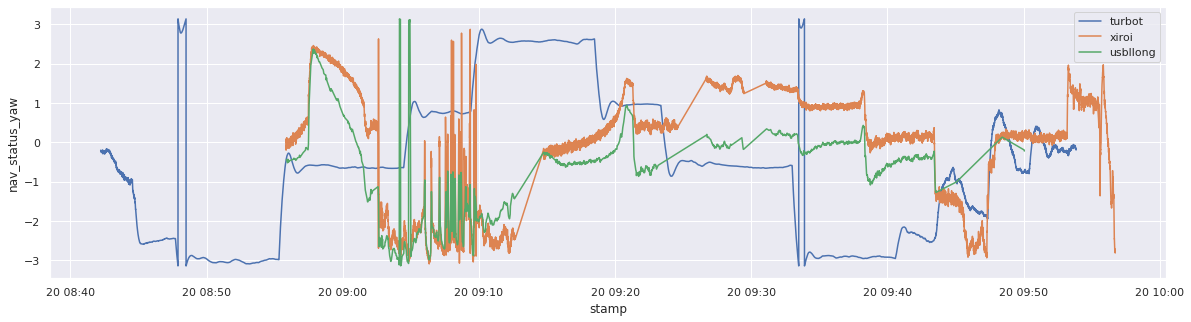

In [6]:
# Plot yaw
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=turbot_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=xiroi_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=USBLlon.dropna(),x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong"])
plt.show()
# The dataset from the xiroi navigation is shorter than the rest
# There is an offset rotation between the xiroi mag and the usbl mag. Let me unify datasets

In [7]:
display(xiroi_nav_status.head())
display(xiroi_nav_status.tail())
print("-------------------------------")
display(turbot_nav_status.head())
display(turbot_nav_status.tail())

nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 08:55:49.600           0.0   -130.563123    -85.852012   
2021-09-20 08:55:49.700           0.0   -130.577015    -85.828461   
2021-09-20 08:55:49.800           0.0   -130.599361    -85.787284   
2021-09-20 08:55:49.900           0.0   -130.611185    -85.760428   
2021-09-20 08:55:50.000           0.0   -130.633773    -85.722165   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 08:55:49.600             0.0                39.1546   
2021-09-20 08:55:49.700             0.0                39.1546   
2021-09-20 08:55:49.800             0.0                39.1546   
2021-09-20 08:55:49.900             0.0                39.1546   
2021-09-20 08:55:50.000             0.0                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 08:55:49.600                 2.9449               0.0   
2021-09-20 08:55:49.700                 2.9449               0.0   
2021-09-20 08:55:49.800                 2.9449               0.0   
2021-09-20 08:55:49.900                 2.9449               0.0   
2021-09-20 08:55:50.000                 2.9449               0.0   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 08:55:49.600              0.0       -0.088441  
2021-09-20 08:55:49.700              0.0       -0.120449  
2021-09-20 08:55:49.800              0.0       -0.169686  
2021-09-20 08:55:49.900              0.0       -0.158685  
2021-09-20 08:55:50.000              0.0       -0.196628

nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 09:56:43.200           0.0     39.825110    -40.194292   
2021-09-20 09:56:43.300           0.0     39.843476    -40.199761   
2021-09-20 09:56:43.400           0.0     39.860291    -40.207929   
2021-09-20 09:56:43.500           0.0     39.885759    -40.215582   
2021-09-20 09:56:43.600           0.0     39.902748    -40.220467   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 09:56:43.200             0.0                39.1546   
2021-09-20 09:56:43.300             0.0                39.1546   
2021-09-20 09:56:43.400             0.0                39.1546   
2021-09-20 09:56:43.500             0.0                39.1546   
2021-09-20 09:56:43.600             0.0                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 09:56:43.200                 2.9449               0.0   
2021-09-20 09:56:43.300                 2.9449               0.0   
2021-09-20 09:56:43.400                 2.9449               0.0   
2021-09-20 09:56:43.500                 2.9449               0.0   
2021-09-20 09:56:43.600                 2.9449               0.0   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 09:56:43.200              0.0       -2.710737  
2021-09-20 09:56:43.300              0.0       -2.732889  
2021-09-20 09:56:43.400              0.0       -2.780557  
2021-09-20 09:56:43.500              0.0       -2.796184  
2021-09-20 09:56:43.600              0.0       -2.811537

-------------------------------


nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 08:42:13.000      0.506199    -33.902916   -159.422529   
2021-09-20 08:42:13.100      0.507821    -33.912110   -159.374051   
2021-09-20 08:42:13.200      0.495657    -33.915700   -159.288979   
2021-09-20 08:42:13.300      0.495107    -33.921633   -159.253229   
2021-09-20 08:42:13.400      0.496664    -33.864073   -159.228206   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 08:42:13.000       28.990601                39.1546   
2021-09-20 08:42:13.100       28.993273                39.1546   
2021-09-20 08:42:13.200       28.953911                39.1546   
2021-09-20 08:42:13.300       28.953846                39.1546   
2021-09-20 08:42:13.400       28.953776                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 08:42:13.000                 2.9449         -0.040683   
2021-09-20 08:42:13.100                 2.9449         -0.034624   
2021-09-20 08:42:13.200                 2.9449         -0.018999   
2021-09-20 08:42:13.300                 2.9449          0.004246   
2021-09-20 08:42:13.400                 2.9449          0.019548   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 08:42:13.000        -0.120349       -0.203954  
2021-09-20 08:42:13.100        -0.139917       -0.211839  
2021-09-20 08:42:13.200        -0.155085       -0.219597  
2021-09-20 08:42:13.300        -0.157989       -0.223435  
2021-09-20 08:42:13.400        -0.153864       -0.223712

nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-20 09:53:51.100      0.573524    -49.068677   -114.906882   
2021-09-20 09:53:51.200      0.571350    -49.070217   -114.897657   
2021-09-20 09:53:51.300      0.570452    -49.070892   -114.893711   
2021-09-20 09:53:51.400      0.561237    -49.055996   -114.905627   
2021-09-20 09:53:51.500      0.559102    -49.052207   -114.905631   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-20 09:53:51.100       31.712197                39.1546   
2021-09-20 09:53:51.200       31.711325                39.1546   
2021-09-20 09:53:51.300       31.709356                39.1546   
2021-09-20 09:53:51.400       31.703972                39.1546   
2021-09-20 09:53:51.500       31.709902                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-20 09:53:51.100                 2.9449          0.135507   
2021-09-20 09:53:51.200                 2.9449          0.134705   
2021-09-20 09:53:51.300                 2.9449          0.132833   
2021-09-20 09:53:51.400                 2.9449          0.131082   
2021-09-20 09:53:51.500                 2.9449          0.126642   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-20 09:53:51.100        -0.097384       -0.182463  
2021-09-20 09:53:51.200        -0.105343       -0.189485  
2021-09-20 09:53:51.300        -0.106868       -0.190681  
2021-09-20 09:53:51.400        -0.105312       -0.188654  
2021-09-20 09:53:51.500        -0.095342       -0.179838

In [8]:
#Create a unified dataframe:
nav = turbot_nav_status.join(xiroi_nav_status, lsuffix='_turbot', rsuffix='_xiroi').dropna()
display(nav.head())
nav=nav.join(USBLlon).dropna()
nav=nav.join(modem_delayed).dropna()
# nav=nav.join(modem_raw).dropna()
nav.head()

nav_status_D_turbot  nav_status_E_turbot  \
stamp                                                               
2021-09-20 08:55:49.600            24.711296           -75.279649   
2021-09-20 08:55:49.700            24.711744           -75.288496   
2021-09-20 08:55:49.800            24.711841           -75.312810   
2021-09-20 08:55:49.900            24.710126           -75.332849   
2021-09-20 08:55:50.000            24.705329           -75.351924   

                         nav_status_N_turbot  nav_status_alt_turbot  \
stamp                                                                 
2021-09-20 08:55:49.600          -256.085350               3.541385   
2021-09-20 08:55:49.700          -256.067541               3.541385   
2021-09-20 08:55:49.800          -256.018118               3.539734   
2021-09-20 08:55:49.900          -255.976210               3.540969   
2021-09-20 08:55:50.000          -255.936373               3.538948   

                         nav_status_origin_lat_turbot  \
stamp                                                   
2021-09-20 08:55:49.600                       39.1546   
2021-09-20 08:55:49.700                       39.1546   
2021-09-20 08:55:49.800                       39.1546   
2021-09-20 08:55:49.900                       39.1546   
2021-09-20 08:55:50.000                       39.1546   

                         nav_status_origin_lon_turbot  \
stamp                                                   
2021-09-20 08:55:49.600                        2.9449   
2021-09-20 08:55:49.700                        2.9449   
2021-09-20 08:55:49.800                        2.9449   
2021-09-20 08:55:49.900                        2.9449   
2021-09-20 08:55:50.000                        2.9449   

                         nav_status_pitch_turbot  nav_status_roll_turbot  \
stamp                                                                      
2021-09-20 08:55:49.600                -0.003231               -0.020046   
2021-09-20 08:55:49.700                -0.001162               -0.018169   
2021-09-20 08:55:49.800                 0.000886               -0.016330   
2021-09-20 08:55:49.900                 0.004321               -0.013566   
2021-09-20 08:55:50.000                 0.005764               -0.012279   

                         nav_status_yaw_turbot  nav_status_D_xiroi  \
stamp                                                                
2021-09-20 08:55:49.600              -0.463232                 0.0   
2021-09-20 08:55:49.700              -0.459931                 0.0   
2021-09-20 08:55:49.800              -0.456631                 0.0   
2021-09-20 08:55:49.900              -0.451077                 0.0   
2021-09-20 08:55:50.000              -0.448799                 0.0   

                         nav_status_E_xiroi  nav_status_N_xiroi  \
stamp                                                             
2021-09-20 08:55:49.600         -130.563123          -85.852012   
2021-09-20 08:55:49.700         -130.577015          -85.828461   
2021-09-20 08:55:49.800         -130.599361          -85.787284   
2021-09-20 08:55:49.900         -130.611185          -85.760428   
2021-09-20 08:55:50.000         -130.633773          -85.722165   

                         nav_status_alt_xiroi  nav_status_origin_lat_xiroi  \
stamp                                                                        
2021-09-20 08:55:49.600                   0.0                      39.1546   
2021-09-20 08:55:49.700                   0.0                      39.1546   
2021-09-20 08:55:49.800                   0.0                      39.1546   
2021-09-20 08:55:49.900                   0.0                      39.1546   
2021-09-20 08:55:50.000                   0.0                      39.1546   

                         nav_status_origin_lon_xiroi  nav_status_pitch_xiroi  \
stamp                                                                          
2021-09-20 08:55:49.600                   

nav_status_D_turbot  nav_status_E_turbot  \
stamp                                                               
2021-09-20 08:55:51.400            24.719359           -75.552937   
2021-09-20 08:55:52.500            24.719796           -75.718709   
2021-09-20 08:55:56.700            24.775436           -76.183027   
2021-09-20 08:55:57.700            24.806982           -76.277217   
2021-09-20 08:55:59.400            24.861003           -76.418971   

                         nav_status_N_turbot  nav_status_alt_turbot  \
stamp                                                                 
2021-09-20 08:55:51.400          -255.473490               3.546049   
2021-09-20 08:55:52.500          -255.064264               3.588041   
2021-09-20 08:55:56.700          -253.597196               3.636026   
2021-09-20 08:55:57.700          -253.239097               3.649216   
2021-09-20 08:55:59.400          -252.635796               3.609664   

                         nav_status_origin_lat_turbot  \
stamp                                                   
2021-09-20 08:55:51.400                       39.1546   
2021-09-20 08:55:52.500                       39.1546   
2021-09-20 08:55:56.700                       39.1546   
2021-09-20 08:55:57.700                       39.1546   
2021-09-20 08:55:59.400                       39.1546   

                         nav_status_origin_lon_turbot  \
stamp                                                   
2021-09-20 08:55:51.400                        2.9449   
2021-09-20 08:55:52.500                        2.9449   
2021-09-20 08:55:56.700                        2.9449   
2021-09-20 08:55:57.700                        2.9449   
2021-09-20 08:55:59.400                        2.9449   

                         nav_status_pitch_turbot  nav_status_roll_turbot  \
stamp                                                                      
2021-09-20 08:55:51.400                 0.012554               -0.032123   
2021-09-20 08:55:52.500                 0.012781               -0.033472   
2021-09-20 08:55:56.700                -0.029212               -0.009593   
2021-09-20 08:55:57.700                -0.043848               -0.040287   
2021-09-20 08:55:59.400                -0.046288               -0.012766   

                         nav_status_yaw_turbot  nav_status_D_xiroi  ...  \
stamp                                                               ...   
2021-09-20 08:55:51.400              -0.405600                 0.0  ...   
2021-09-20 08:55:52.500              -0.375195                 0.0  ...   
2021-09-20 08:55:56.700              -0.299556                 0.0  ...   
2021-09-20 08:55:57.700              -0.288335                 0.0  ...   
2021-09-20 08:55:59.400              -0.276144                 0.0  ...   

                         usbllong_pitch  usbllong_roll  usbllong_yaw  \
stamp                                                                  
2021-09-20 08:55:51.400          0.0332         0.0272       -0.4395   
2021-09-20 08:55:52.500          0.0403        -0.0229       -0.4512   
2021-09-20 08:55:56.700         -0.0002         0.0143       -0.5184   
2021-09-20 08:55:57.700         -0.0192         0.0546       -0.4271   
2021-09-20 08:55:59.400         -0.0188         0.0648       -0.4677   

                         modem_delayed_X  modem_delayed_Y  modem_delayed_Z  \
stamp                                                                        
2021-09-20 08:55:51.400      -238.188502      -168.319271          12.2279   
2021-09-20 08:55:52.500      -238.818923      -164.675551          13.0069   
2021-09-20 08:55:56.700      -234.495405      -175.384033          10.0167   
2021-09-20 08:55:57.700      -237.027437      -163.387981           7.0835   
2021-09-20 08:55:59.400      -231.347518      -181.331456          11.1511   

                         modem_delayed_ori_W  modem_delayed_ori_X  \
stamp                                                          

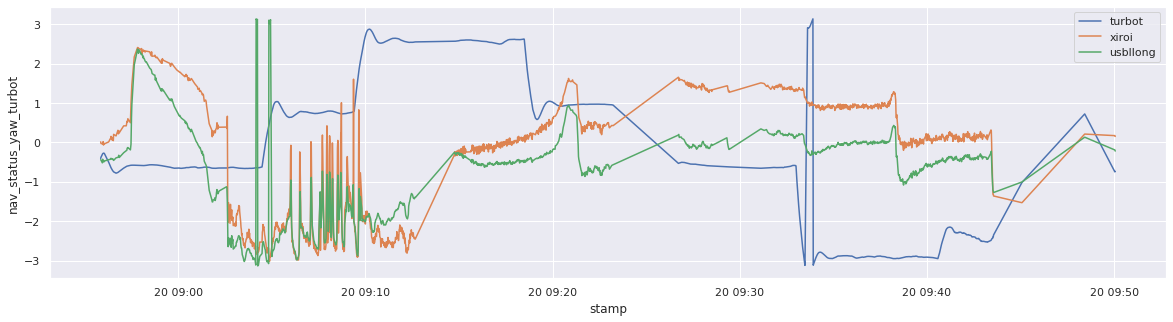

In [9]:
# Plot yaw again
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong"])
plt.show()

In [10]:
# Now get the mean yaw difference
yaw_diff = nav.nav_status_yaw_xiroi.mean() - nav.usbllong_yaw.mean()
print(yaw_diff*180/np.pi)

# We will assume that ther is a 90º rotation
nav['usbllong_yaw_corrected'] = nav['usbllong_yaw'] 

31.172996232929695


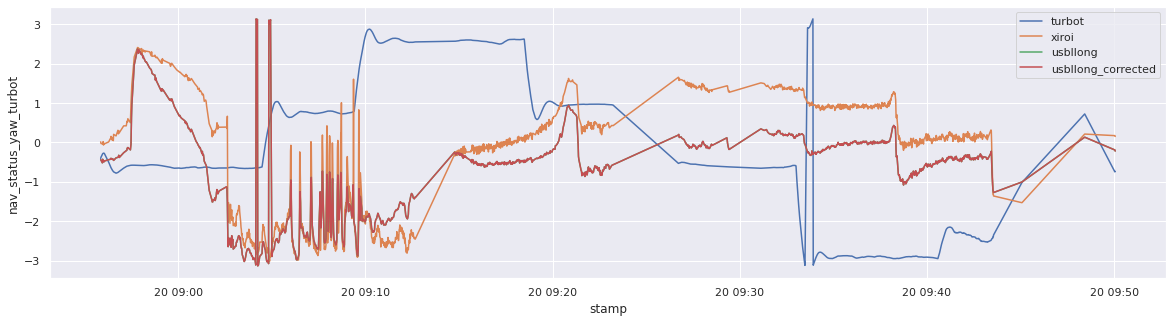

In [11]:
# Plot yaw again!!
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw_corrected",ax=ax)
plt.legend(["turbot","xiroi","usbllong", "usbllong_corrected"])
plt.show()
# The differences are due to the use of different calibrations

In [28]:
# Lets transform the USBL measurements, use the following transformation matrix for the rotations
# x' = xcos(yaw) - ysin(yaw)
# y' = xsin(yaw) + cos(yaw)

# 1 - Xiroi + usbllong (mag xiroi)
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["nav_status_yaw_xiroi"])-nav['usbllong_Y']*np.sin(nav["nav_status_yaw_xiroi"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["nav_status_yaw_xiroi"])+nav['usbllong_Y']*np.cos(nav["nav_status_yaw_xiroi"])
nav['p1_N'] = nav['nav_status_N_xiroi'] + usbllong_X_transf
nav['p1_E'] = nav['nav_status_E_xiroi'] + usbllong_Y_transf

# 2 - Xiroi + usbllong (mag usbl) 
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["usbllong_yaw_corrected"])-nav['usbllong_Y']*np.sin(nav["usbllong_yaw_corrected"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["usbllong_yaw_corrected"])+nav['usbllong_Y']*np.cos(nav["usbllong_yaw_corrected"])
nav['p2_N'] = nav['nav_status_N_xiroi']+usbllong_X_transf
nav['p2_E'] = nav['nav_status_E_xiroi']+usbllong_Y_transf

# 2 - Xiroi + usbllong (mag usbl) 
# usbllong_X_transf = nav['usbllong_X']*np.cos(nav["usbllong_yaw_corrected"])-nav['usbllong_Y']*np.sin(nav["usbllong_yaw_corrected"])
# usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["usbllong_yaw_corrected"])+nav['usbllong_Y']*np.cos(nav["usbllong_yaw_corrected"])
nav['p3_N'] = nav['nav_status_N_xiroi']+nav["usbllong_N"]
nav['p3_E'] = nav['nav_status_E_xiroi']+nav["usbllong_E"]


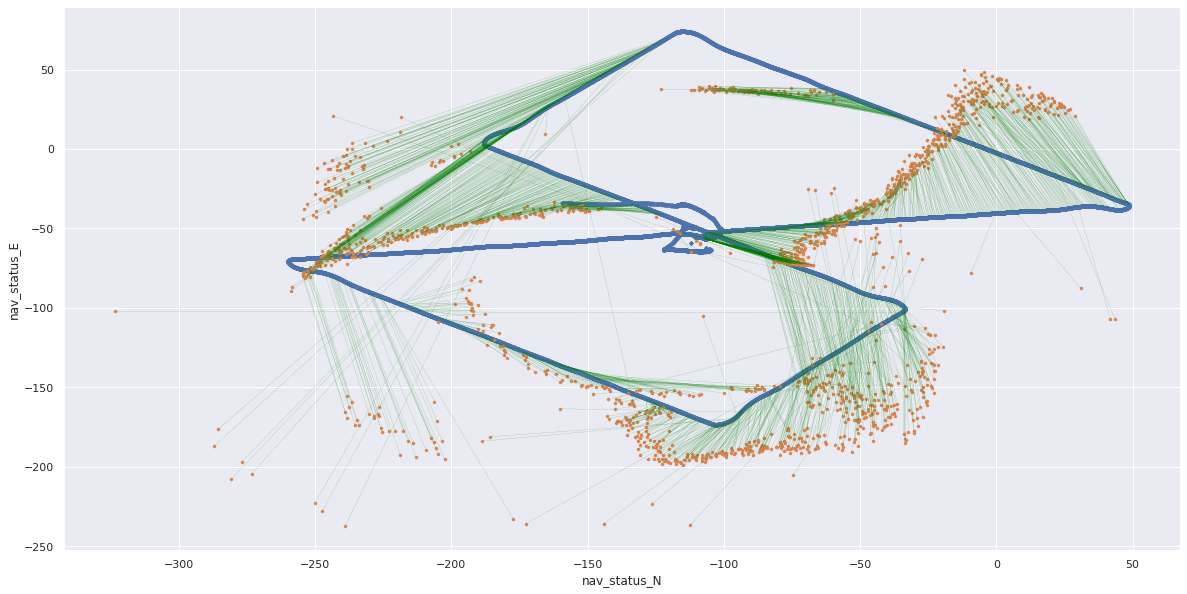

In [13]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='green')



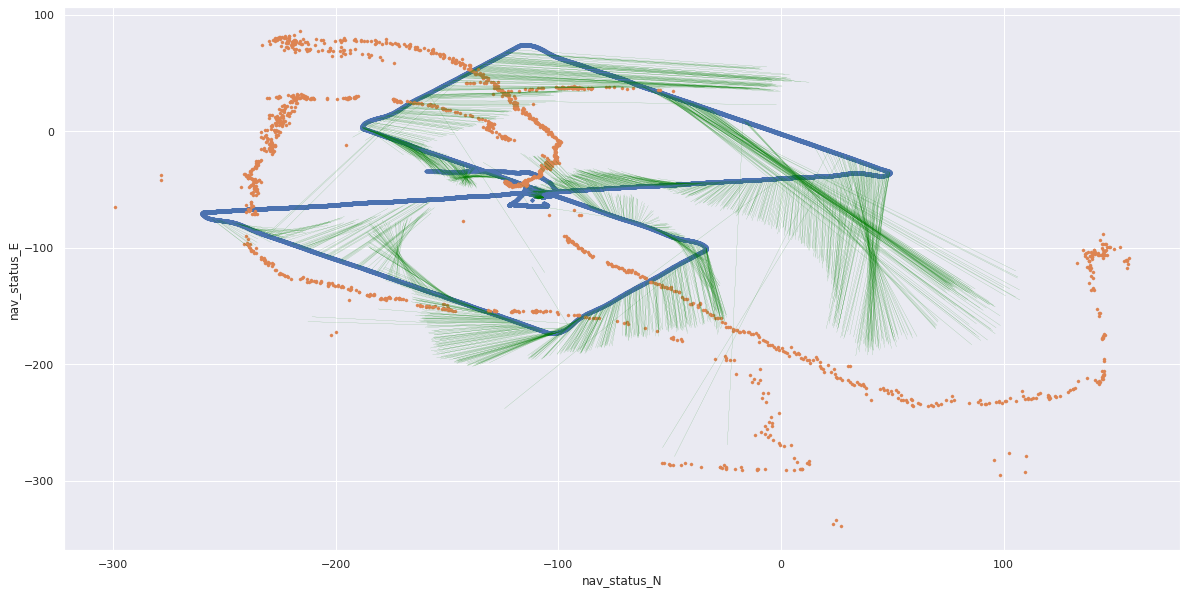

In [29]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p3_N", y="p3_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax,color="red")

for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p2_N], [row.nav_status_E_turbot, row.p2_E], linewidth=0.1, c='green')

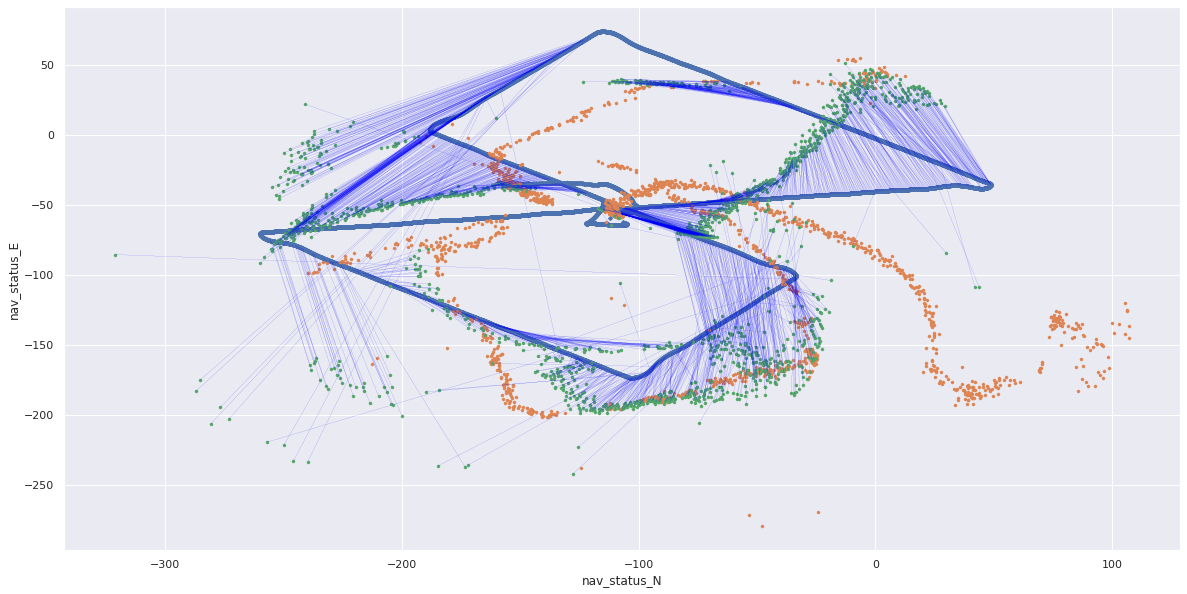

In [15]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=modem_delayed,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

for index, row in nav.iterrows():
    # plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='orange')
    plt.plot([row.nav_status_N_turbot, row.modem_delayed_X], [row.nav_status_E_turbot, row.modem_delayed_Y], linewidth=0.1, c='blue')

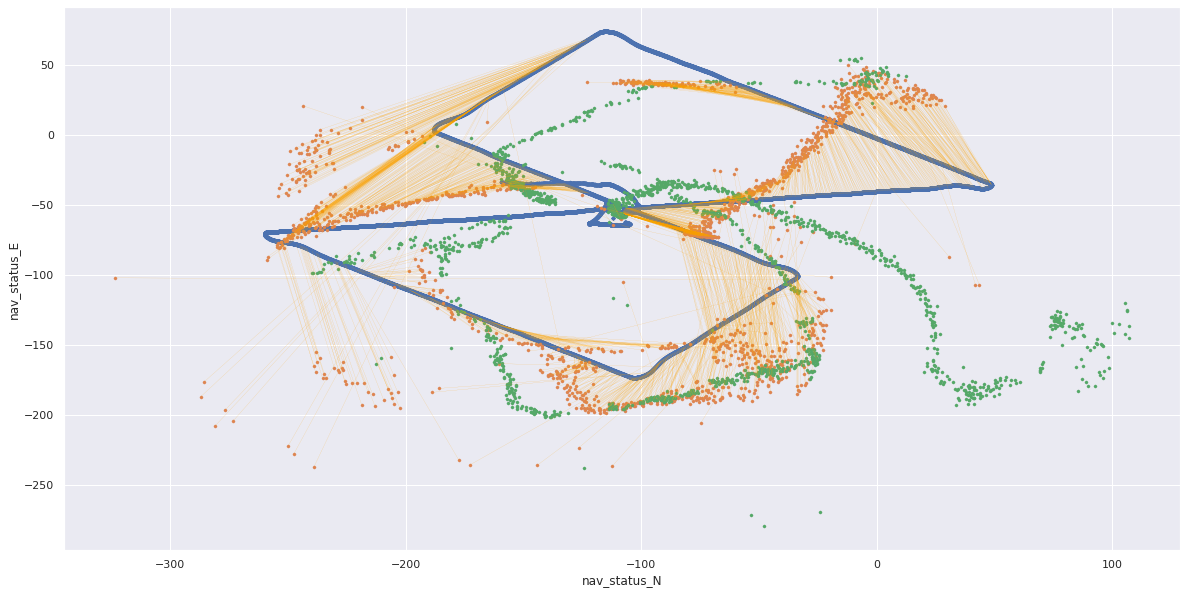

In [16]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=modem_delayed,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='orange')
    # plt.plot([row.nav_status_N_turbot, row.modem_delayed_X], [row.nav_status_E_turbot, row.modem_delayed_Y], linewidth=0.1, c='blue')
    

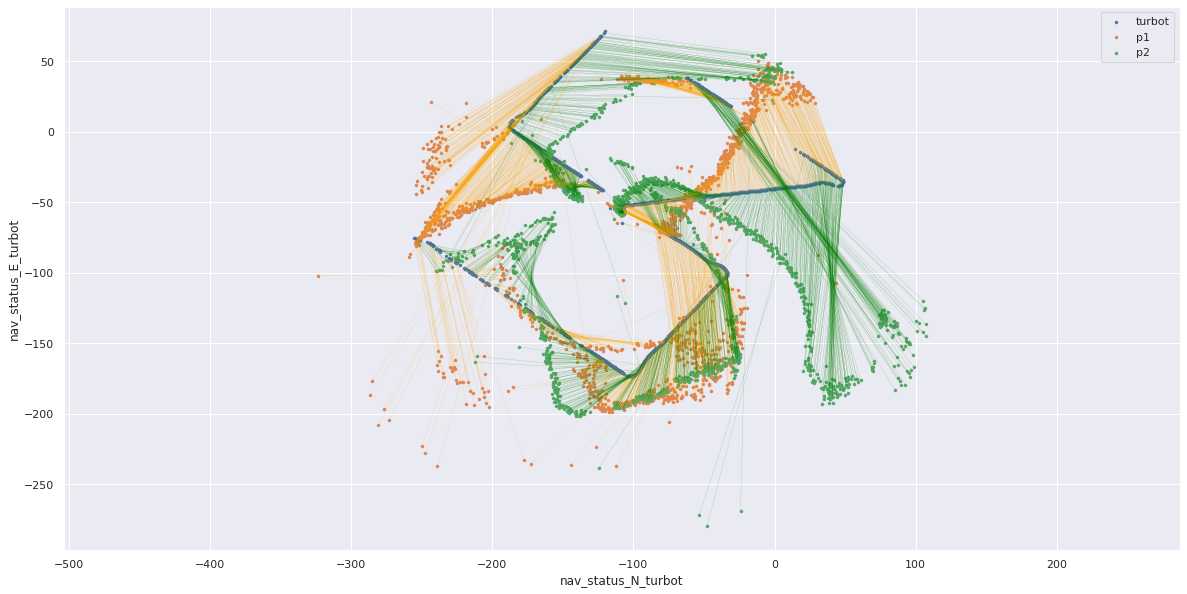

In [17]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","p1","p2","modem_raw"])
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='orange')
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p2_N], [row.nav_status_E_turbot, row.p2_E], linewidth=0.1, c='green')
plt.axis('equal')
plt.show()

In [18]:
# Compute error
N_error_p1 = np.abs(nav['nav_status_N_turbot']-nav['p1_N'])
E_error_p1 = np.abs(nav['nav_status_E_turbot']-nav['p1_E'])
nav['error_p1'] = np.sqrt(np.power(N_error_p1,2)+np.power(E_error_p1,2))

N_error_p2 = np.abs(nav['nav_status_N_turbot']-nav['p2_N'])
E_error_p2 = np.abs(nav['nav_status_E_turbot']-nav['p2_E'])
nav['error_p2'] = np.sqrt(np.power(N_error_p2,2)+np.power(E_error_p2,2))

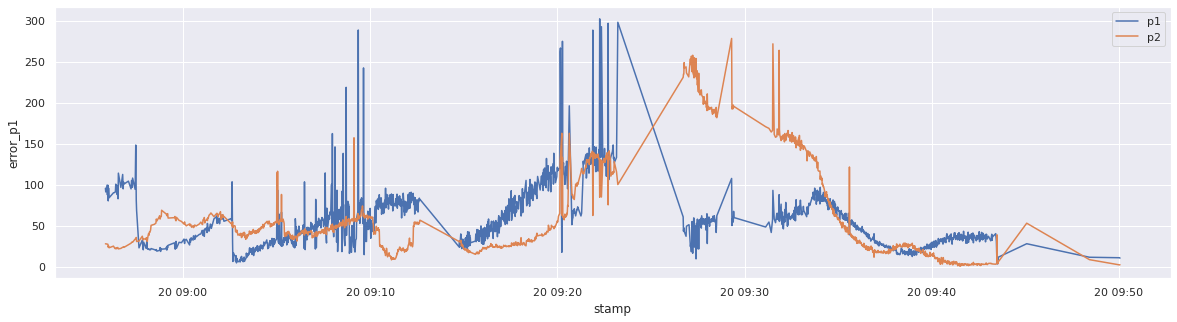

In [19]:
# Plot error 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="error_p1",ax=ax)
sns.lineplot(data=nav,x="stamp", y="error_p2",ax=ax)
plt.legend(["p1","p2"])
plt.show()

In [20]:
# Compute acoustic distance 
E_dist = np.abs(nav['nav_status_E_turbot']-nav['nav_status_E_xiroi'])
N_dist = np.abs(nav['nav_status_N_turbot']-nav['nav_status_N_xiroi'])
D_dist = nav['nav_status_D_turbot']-nav['nav_status_D_xiroi']

nav['dist_2D']=np.sqrt(np.power(E_dist,2)+np.power(N_dist,2))
nav['dist_3D']=np.sqrt(np.power(nav['dist_2D'],2)+np.power(D_dist,2))

In [21]:
nav.head()

nav_status_D_turbot  nav_status_E_turbot  \
stamp                                                               
2021-09-20 08:55:51.400            24.719359           -75.552937   
2021-09-20 08:55:52.500            24.719796           -75.718709   
2021-09-20 08:55:56.700            24.775436           -76.183027   
2021-09-20 08:55:57.700            24.806982           -76.277217   
2021-09-20 08:55:59.400            24.861003           -76.418971   

                         nav_status_N_turbot  nav_status_alt_turbot  \
stamp                                                                 
2021-09-20 08:55:51.400          -255.473490               3.546049   
2021-09-20 08:55:52.500          -255.064264               3.588041   
2021-09-20 08:55:56.700          -253.597196               3.636026   
2021-09-20 08:55:57.700          -253.239097               3.649216   
2021-09-20 08:55:59.400          -252.635796               3.609664   

                         nav_status_origin_lat_turbot  \
stamp                                                   
2021-09-20 08:55:51.400                       39.1546   
2021-09-20 08:55:52.500                       39.1546   
2021-09-20 08:55:56.700                       39.1546   
2021-09-20 08:55:57.700                       39.1546   
2021-09-20 08:55:59.400                       39.1546   

                         nav_status_origin_lon_turbot  \
stamp                                                   
2021-09-20 08:55:51.400                        2.9449   
2021-09-20 08:55:52.500                        2.9449   
2021-09-20 08:55:56.700                        2.9449   
2021-09-20 08:55:57.700                        2.9449   
2021-09-20 08:55:59.400                        2.9449   

                         nav_status_pitch_turbot  nav_status_roll_turbot  \
stamp                                                                      
2021-09-20 08:55:51.400                 0.012554               -0.032123   
2021-09-20 08:55:52.500                 0.012781               -0.033472   
2021-09-20 08:55:56.700                -0.029212               -0.009593   
2021-09-20 08:55:57.700                -0.043848               -0.040287   
2021-09-20 08:55:59.400                -0.046288               -0.012766   

                         nav_status_yaw_turbot  nav_status_D_xiroi  ...  \
stamp                                                               ...   
2021-09-20 08:55:51.400              -0.405600                 0.0  ...   
2021-09-20 08:55:52.500              -0.375195                 0.0  ...   
2021-09-20 08:55:56.700              -0.299556                 0.0  ...   
2021-09-20 08:55:57.700              -0.288335                 0.0  ...   
2021-09-20 08:55:59.400              -0.276144                 0.0  ...   

                         modem_delayed_ori_Z  usbllong_yaw_corrected  \
stamp                                                                  
2021-09-20 08:55:51.400             0.003323                 -0.4395   
2021-09-20 08:55:52.500            -0.015595                 -0.4512   
2021-09-20 08:55:56.700            -0.012658                 -0.5184   
2021-09-20 08:55:57.700            -0.005731                 -0.4271   
2021-09-20 08:55:59.400             0.035215                 -0.4677   

                               p1_N        p1_E        p2_N       p2_E  \
stamp                                                                    
2021-09-20 08:55:51.400 -238.224368 -169.485425 -239.712581 -98.501757   
2021-09-20 08:55:52.500 -238.968045 -165.362770 -239.461844 -98.818361   
2021-09-20 08:55:56.700 -235.256517 -173.816048 -237.452203 -98.441467   
2021-09-20 08:55:57.700 -237.548426 -162.438888 -236.966679 -98.335881   
2021-09-20 08:55:59.400 -233.912720 -173.845210 -235.781356 -97.856585   

                          error_p1   error_p2     dist_2D     dist_3D  
stamp                                                                  
2021-09-20 08:55

nav_status_D_turbot  nav_status_E_turbot  \
stamp                                                               
2021-09-20 08:55:51.400            24.719359           -75.552937   
2021-09-20 08:55:52.500            24.719796           -75.718709   
2021-09-20 08:55:56.700            24.775436           -76.183027   
2021-09-20 08:55:57.700            24.806982           -76.277217   
2021-09-20 08:55:59.400            24.861003           -76.418971   

                         nav_status_N_turbot  nav_status_alt_turbot  \
stamp                                                                 
2021-09-20 08:55:51.400          -255.473490               3.546049   
2021-09-20 08:55:52.500          -255.064264               3.588041   
2021-09-20 08:55:56.700          -253.597196               3.636026   
2021-09-20 08:55:57.700          -253.239097               3.649216   
2021-09-20 08:55:59.400          -252.635796               3.609664   

                         nav_status_origin_lat_turbot  \
stamp                                                   
2021-09-20 08:55:51.400                       39.1546   
2021-09-20 08:55:52.500                       39.1546   
2021-09-20 08:55:56.700                       39.1546   
2021-09-20 08:55:57.700                       39.1546   
2021-09-20 08:55:59.400                       39.1546   

                         nav_status_origin_lon_turbot  \
stamp                                                   
2021-09-20 08:55:51.400                        2.9449   
2021-09-20 08:55:52.500                        2.9449   
2021-09-20 08:55:56.700                        2.9449   
2021-09-20 08:55:57.700                        2.9449   
2021-09-20 08:55:59.400                        2.9449   

                         nav_status_pitch_turbot  nav_status_roll_turbot  \
stamp                                                                      
2021-09-20 08:55:51.400                 0.012554               -0.032123   
2021-09-20 08:55:52.500                 0.012781               -0.033472   
2021-09-20 08:55:56.700                -0.029212               -0.009593   
2021-09-20 08:55:57.700                -0.043848               -0.040287   
2021-09-20 08:55:59.400                -0.046288               -0.012766   

                         nav_status_yaw_turbot  nav_status_D_xiroi  ...  \
stamp                                                               ...   
2021-09-20 08:55:51.400              -0.405600                 0.0  ...   
2021-09-20 08:55:52.500              -0.375195                 0.0  ...   
2021-09-20 08:55:56.700              -0.299556                 0.0  ...   
2021-09-20 08:55:57.700              -0.288335                 0.0  ...   
2021-09-20 08:55:59.400              -0.276144                 0.0  ...   

                               p1_N        p1_E        p2_N       p2_E  \
stamp                                                                    
2021-09-20 08:55:51.400 -238.224368 -169.485425 -239.712581 -98.501757   
2021-09-20 08:55:52.500 -238.968045 -165.362770 -239.461844 -98.818361   
2021-09-20 08:55:56.700 -235.256517 -173.816048 -237.452203 -98.441467   
2021-09-20 08:55:57.700 -237.548426 -162.438888 -236.966679 -98.335881   
2021-09-20 08:55:59.400 -233.912720 -173.845210 -235.781356 -97.856585   

                          error_p1   error_p2     dist_2D     dist_3D  \
stamp                                                                   
2021-09-20 08:55:51.400  95.503113  27.839803  178.977351  180.676337   
2021-09-20 08:55:52.500  91.077692  27.875247  178.985053  180.684027   
2021-09-20 08:55:56.700  99.340764  27.497253  179.126911  180.832167   
2021-09-20 08:55:57.700  87.578712  27.411244  179.126006  180.835595   
2021-09-20 08:55:59.400  99.208999  27.269827  179.203522  180.919794   

                         setpoint_0  setpoint_1  
stamp                                            
2021-09-20 08:55:51.400    0.233134    0.494110  
202

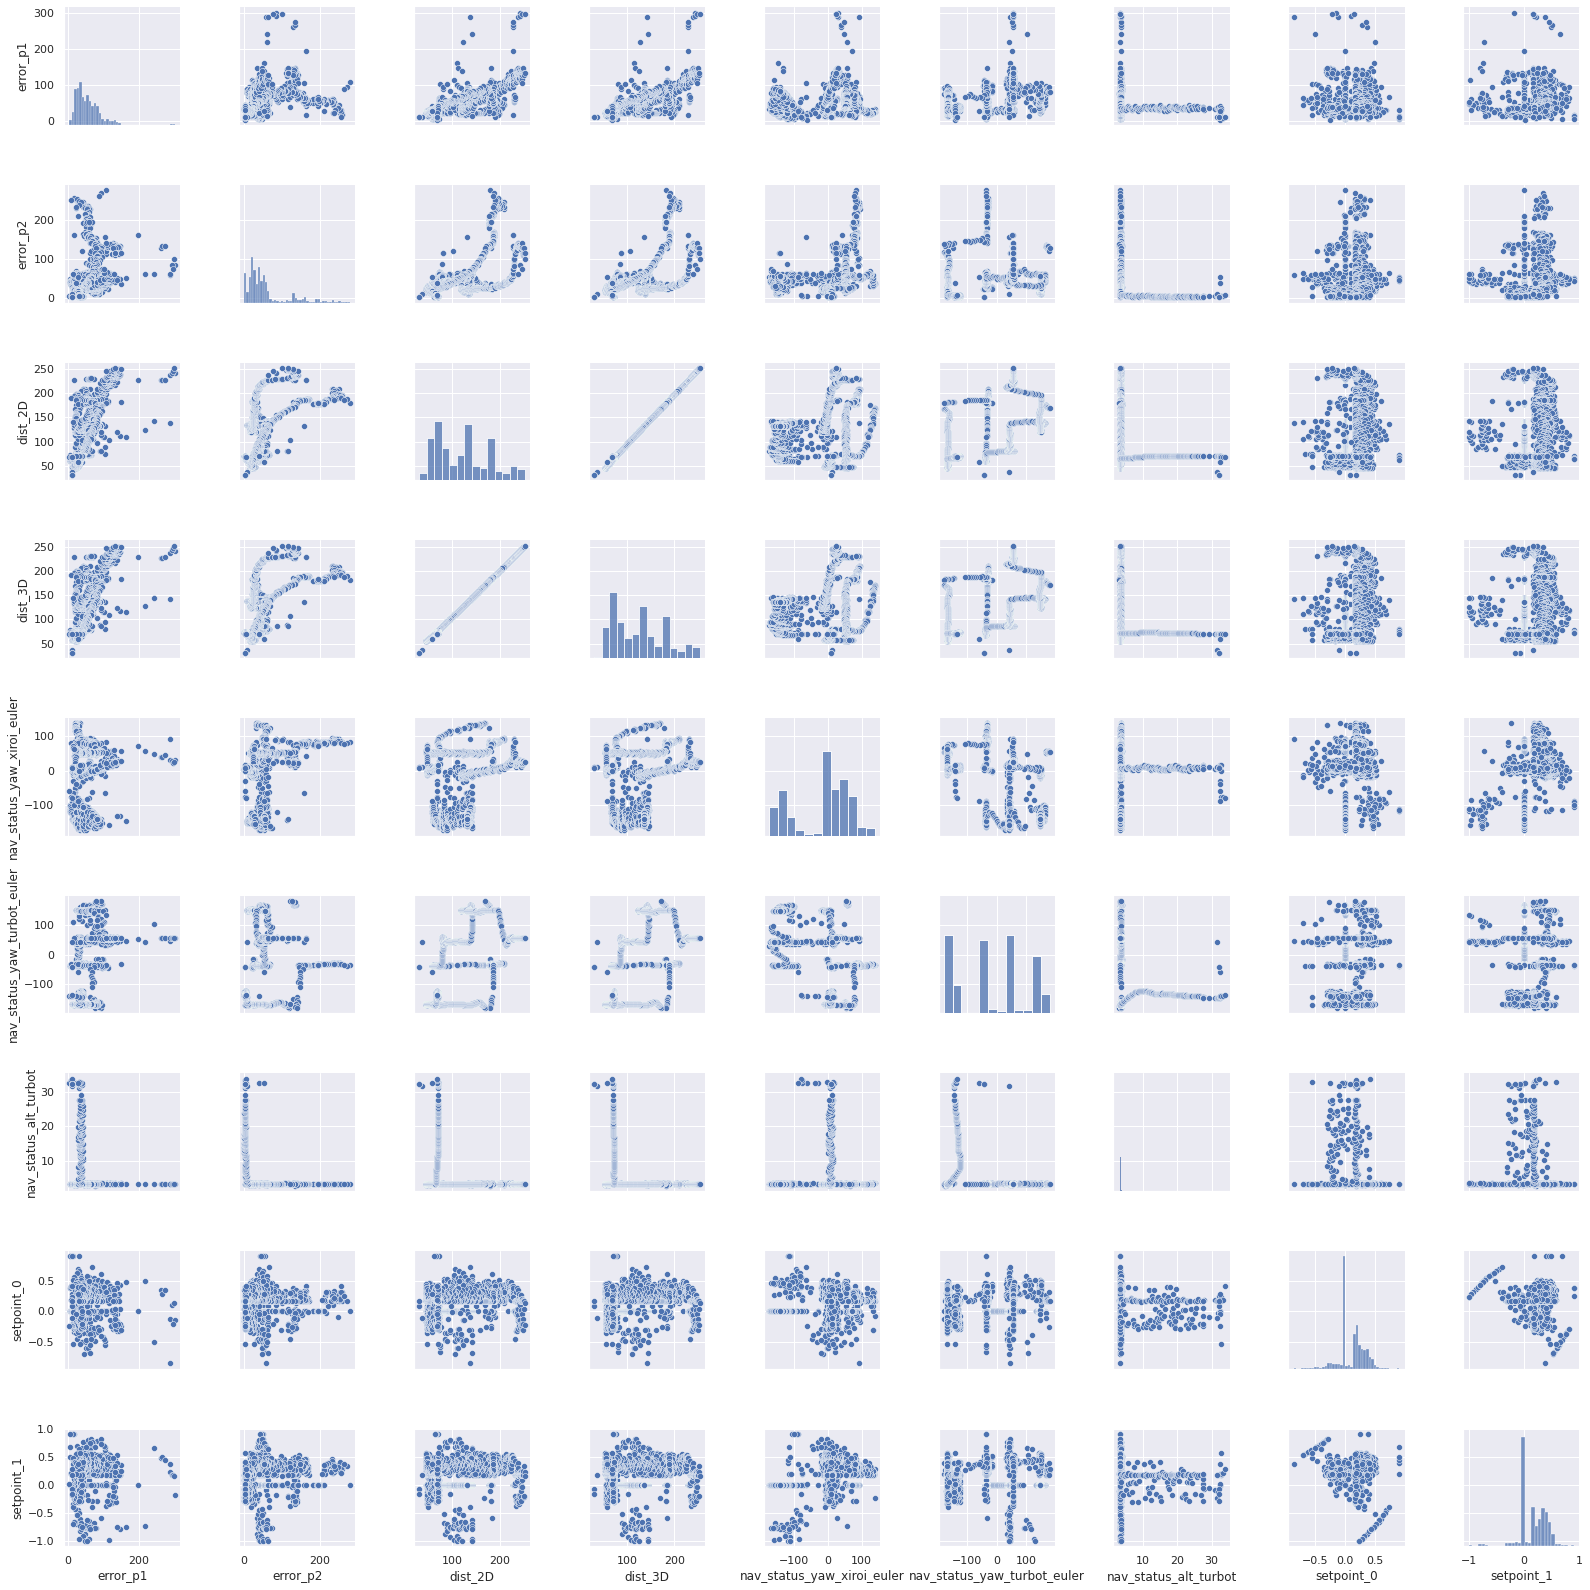

In [22]:
nav=nav.join(xiroi_setpoints).dropna()
# Error correlation with distance and orientation
display(nav.head())
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
nav['nav_status_yaw_turbot_euler'] = nav['nav_status_yaw_turbot'] *180/np.pi 
nav_corr=nav[['error_p1','error_p2','dist_2D','dist_3D','nav_status_yaw_xiroi_euler','nav_status_yaw_turbot_euler','nav_status_alt_turbot',"setpoint_0",'setpoint_1']]
sns.pairplot(nav_corr)

error_p1     error_p2      dist_3D  nav_status_yaw_xiroi
count  1738.000000  1738.000000  1738.000000           1738.000000
mean     55.120013    54.794349   126.694180             -0.241133
std      34.881109    53.437210    53.979680              1.442528
min       3.248446     0.880666    31.097700             -3.018258
25%      30.370346    22.333692    74.131418             -1.849366
50%      48.096032    39.129178   123.981310              0.098827
75%      73.130208    58.811547   170.719267              0.912242
max     302.007572   278.139160   253.218827              2.412002

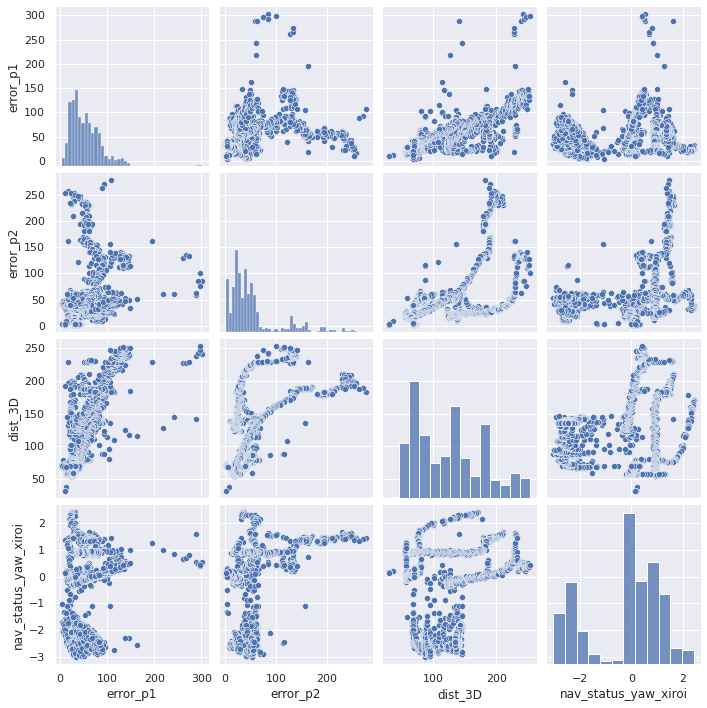

In [23]:
# Error correlation with distance and orientation
nav_corr=nav[['error_p1','error_p2','dist_3D','nav_status_yaw_xiroi']]
sns.pairplot(nav_corr)
# There is a clear correlation between the usbl error and the xiroi orientation, not that evident but important with the distance
display(nav_corr.describe())

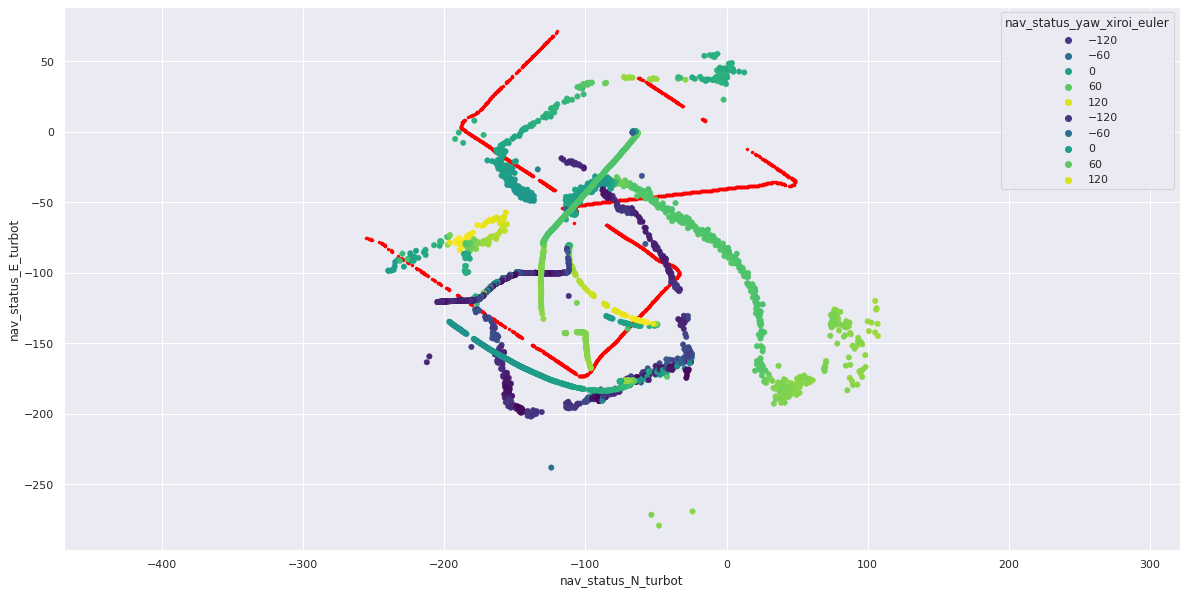

In [24]:
# Lets plot again the localization results, this time color represents the xiroi orientation
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

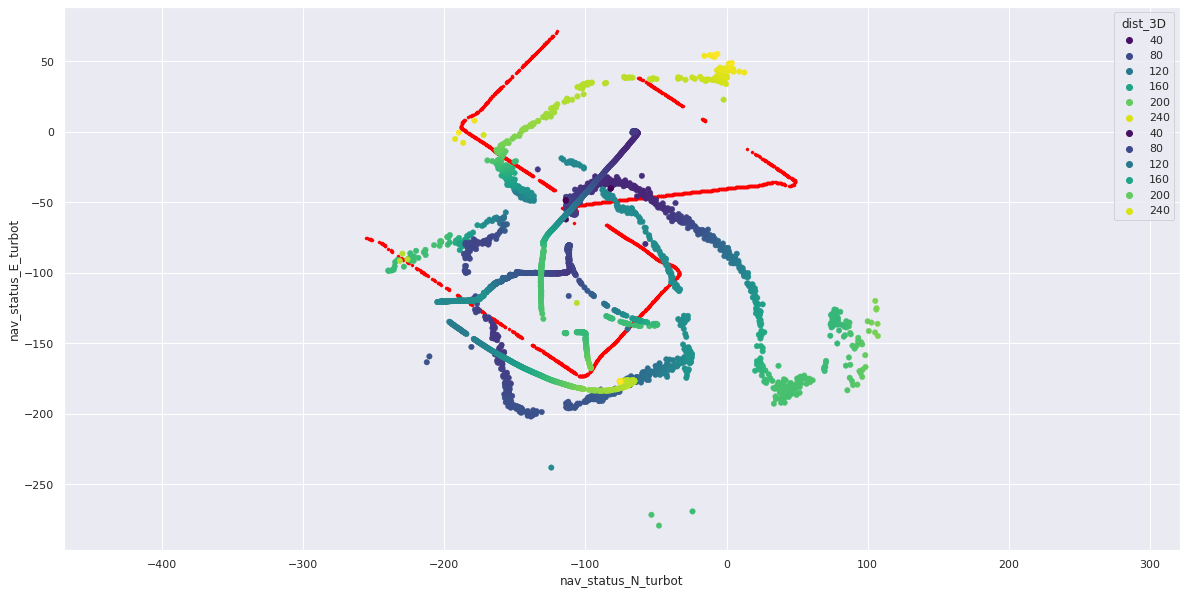

In [25]:
# Lets plot again the localization results, this time color represents the distance
sns.set(rc={'figure.figsize':(20,10)})
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

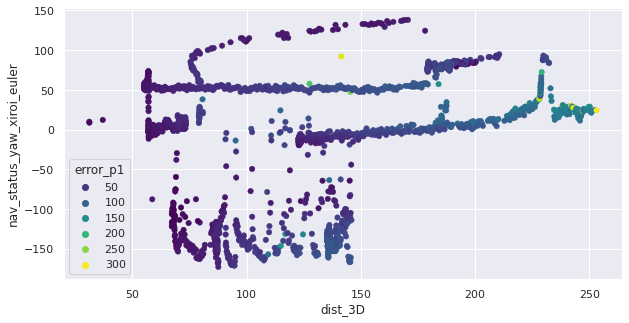

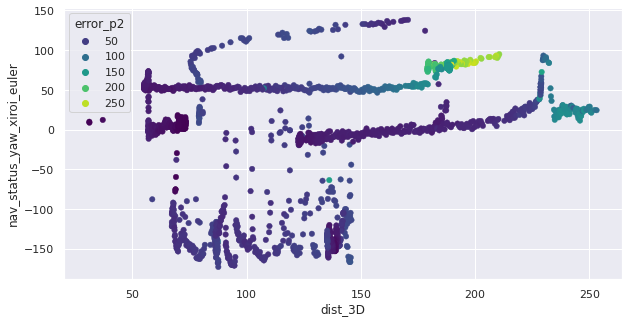

In [26]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="dist_3D", y="nav_status_yaw_xiroi_euler", hue='error_p1', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.show()
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="dist_3D", y="nav_status_yaw_xiroi_euler", hue='error_p2', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.show()

In [27]:
# Check correlation with setpoints or speeds
# There is a clear correlation with the orientation. However it is not conclusive, we should check the correlation with setpoints or speeds. And check that in other datasets we find the same behavior.
# In case that we confirm this correlation find the cause
# Extract the RSSI values too